In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# time data manipulation
from datetime import datetime, timedelta

# pipeline construction
from sklearn.pipeline import Pipeline

# models trainng
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# data processing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from imblearn.over_sampling import SMOTE

# models validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# measuring execution time
import time

# <<<<<<<<<<<<<<< Credit Card Fraud Detection >>>>>>>>>>>>>>>
by: Eryk Langa

# Dataset: downloading and description

Dataset has been downloaded from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [2]:
raw_df = pd.read_csv('creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
raw_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Description:

"The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise."

(source: "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data")

# Basic Exploratory Data Analysis

In [4]:
raw_df.shape

(284807, 31)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
raw_df.isnull().sum().any()

False

In [7]:
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


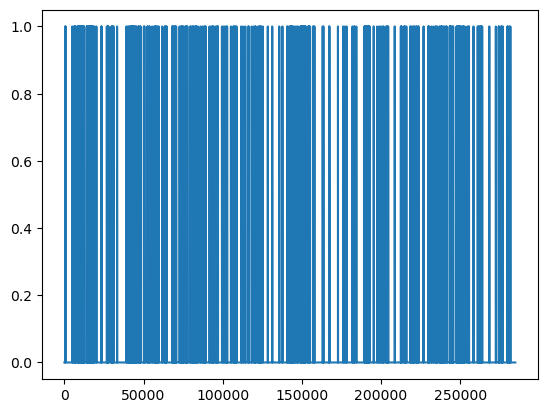

In [8]:
plt.plot(raw_df['Class'])
plt.show()

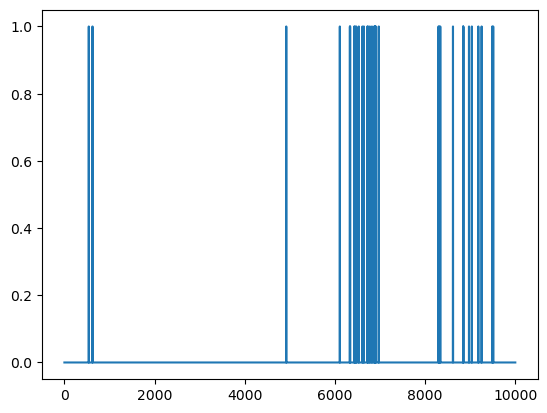

In [9]:
plt.plot(raw_df['Class'].head(10000))
plt.show()

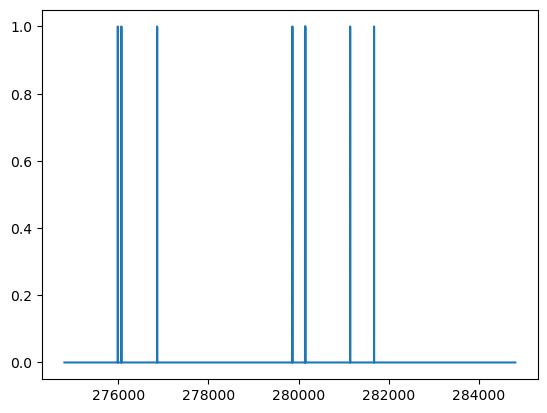

In [10]:
plt.plot(raw_df['Class'].tail(10000))
plt.show()

### Let's check if there really are 2 days.

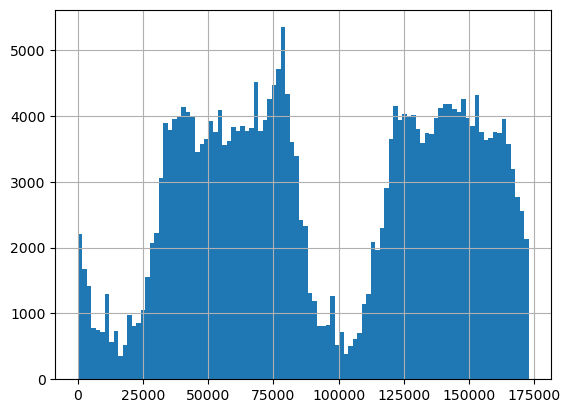

In [11]:
raw_df['Time'].hist(bins=100)
plt.show()

In [12]:
seconds_in_2_days = 60*60*24*2
seconds_in_raw_df = raw_df['Time'].tail(1)
diff_in_secs = int((seconds_in_2_days - seconds_in_raw_df).iloc[0])

print(f'Dataset lacks {diff_in_secs} seconds of two days.')

Dataset lacks 8 seconds of two days.


In [13]:
diff_sec_perc = diff_in_secs / seconds_in_2_days * 100
print(f'And those {diff_in_secs} seconds are {round(diff_sec_perc, 4)}% of the total database.')

And those 8 seconds are 0.0046% of the total database.


### The description indicates that the time represents two days in September 2013, and this has just been confirmed.

### Let's say those two days were in the middle of the week: 4-5 September. This will help with Features Engineering.

In [14]:
raw_df['Time'] = raw_df['Time'].apply(lambda x: datetime(2013, 9, 4) + timedelta(seconds = x))

In [15]:
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2013-09-04 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2013-09-04 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2013-09-04 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,2013-09-04 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2013-09-04 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
raw_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,2013-09-05 23:59:46,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,2013-09-05 23:59:47,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,2013-09-05 23:59:48,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,2013-09-05 23:59:48,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,2013-09-05 23:59:52,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


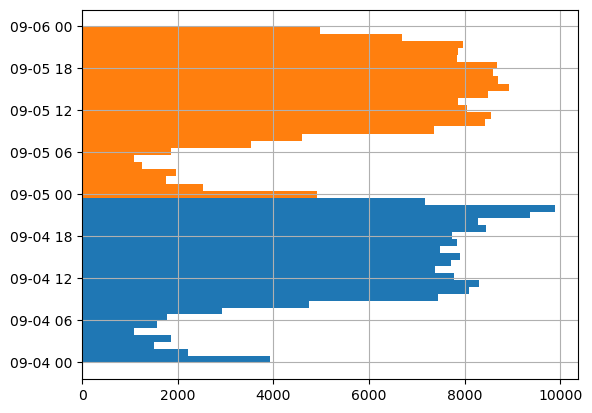

In [17]:
raw_df['Time'].loc[:len(raw_df)/2].hist(bins=24, orientation='horizontal')
raw_df['Time'].loc[len(raw_df)/2:].hist(bins=24, orientation='horizontal')
plt.show()

In [18]:
print(f'Total length: {len(raw_df)}')
print()

for column in raw_df:
    print(f'{column} - {len(raw_df[column].unique())}')
    if len(raw_df[column].unique()) == len(raw_df[raw_df.columns[raw_df.columns.get_loc(column)-1]].unique()):
        print("Same amount as before.")
    print()

Total length: 284807

Time - 124592

V1 - 275663

V2 - 275663
Same amount as before.

V3 - 275663
Same amount as before.

V4 - 275663
Same amount as before.

V5 - 275663
Same amount as before.

V6 - 275663
Same amount as before.

V7 - 275663
Same amount as before.

V8 - 275663
Same amount as before.

V9 - 275663
Same amount as before.

V10 - 275663
Same amount as before.

V11 - 275663
Same amount as before.

V12 - 275663
Same amount as before.

V13 - 275663
Same amount as before.

V14 - 275663
Same amount as before.

V15 - 275663
Same amount as before.

V16 - 275663
Same amount as before.

V17 - 275663
Same amount as before.

V18 - 275663
Same amount as before.

V19 - 275663
Same amount as before.

V20 - 275663
Same amount as before.

V21 - 275663
Same amount as before.

V22 - 275663
Same amount as before.

V23 - 275663
Same amount as before.

V24 - 275663
Same amount as before.

V25 - 275663
Same amount as before.

V26 - 275663
Same amount as before.

V27 - 275663
Same amount as befor

Column: V1
Unique values: 275663


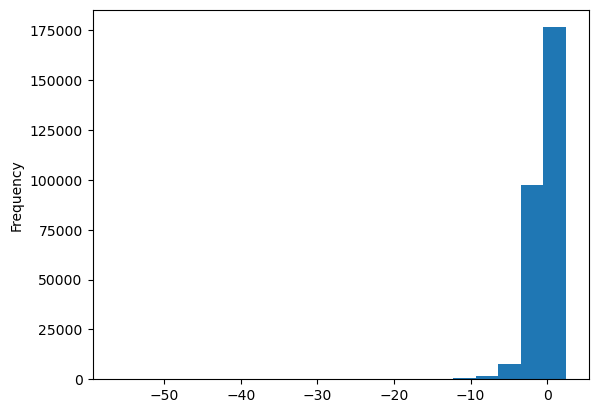

Column: V2
Unique values: 275663


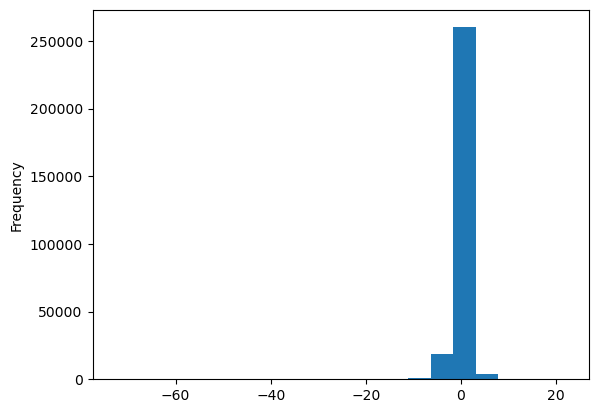

Column: V3
Unique values: 275663


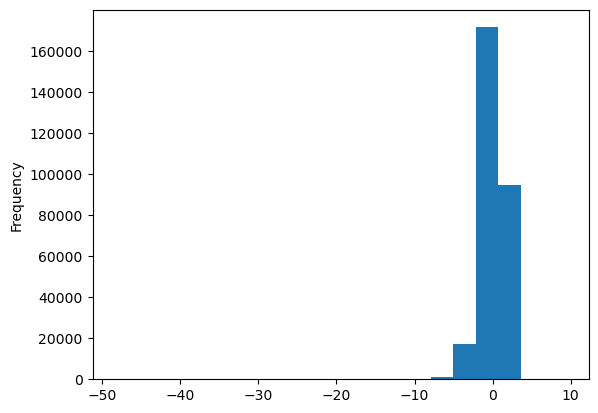

Column: V4
Unique values: 275663


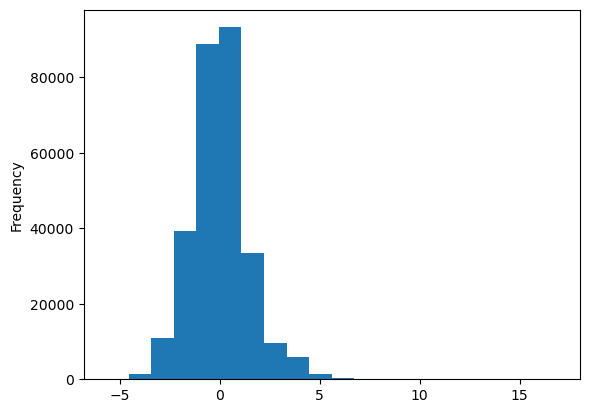

Column: V5
Unique values: 275663


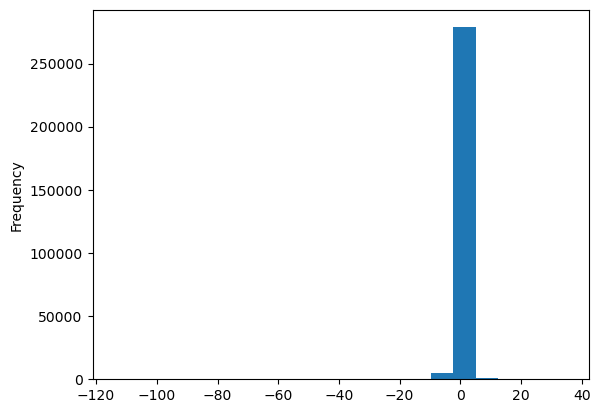

Column: V6
Unique values: 275663


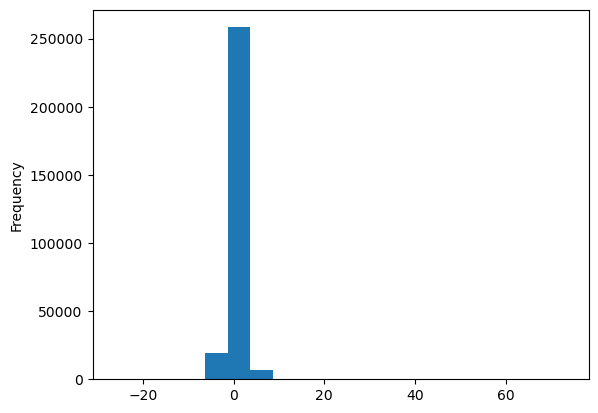

Column: V7
Unique values: 275663


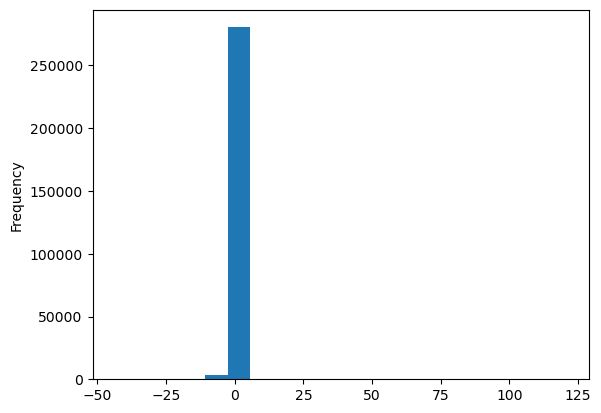

Column: V8
Unique values: 275663


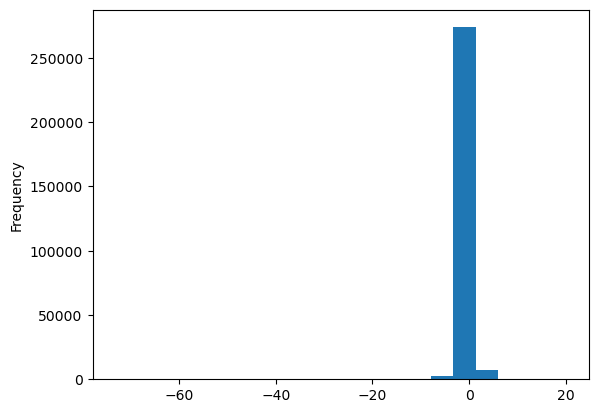

Column: V9
Unique values: 275663


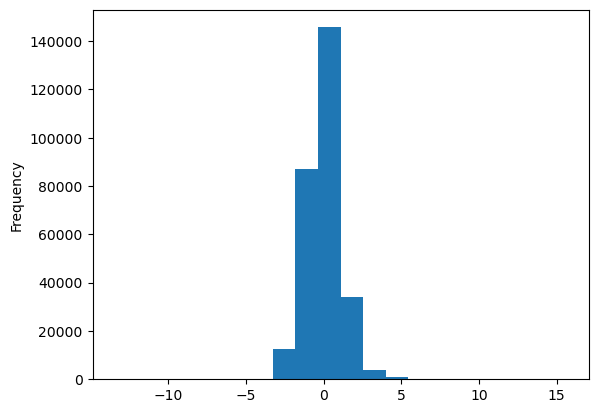

Column: V10
Unique values: 275663


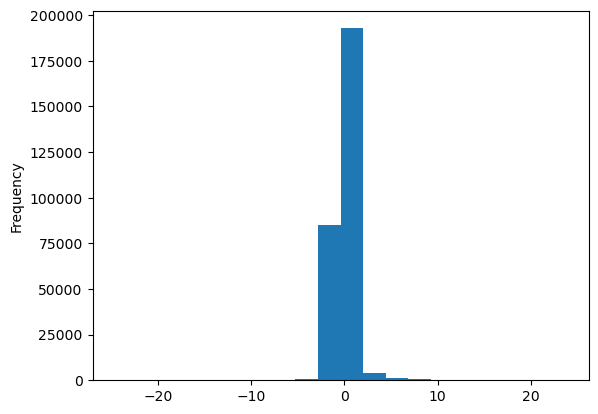

Column: V11
Unique values: 275663


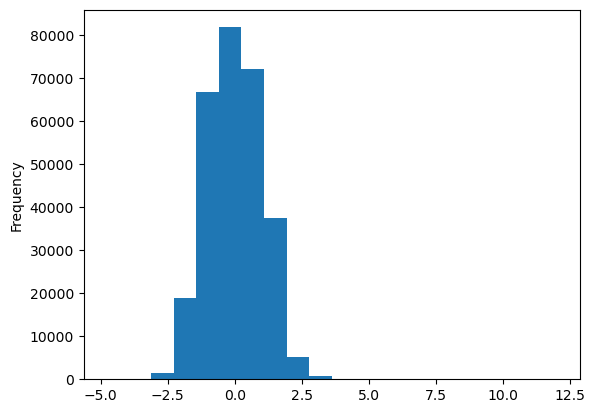

Column: V12
Unique values: 275663


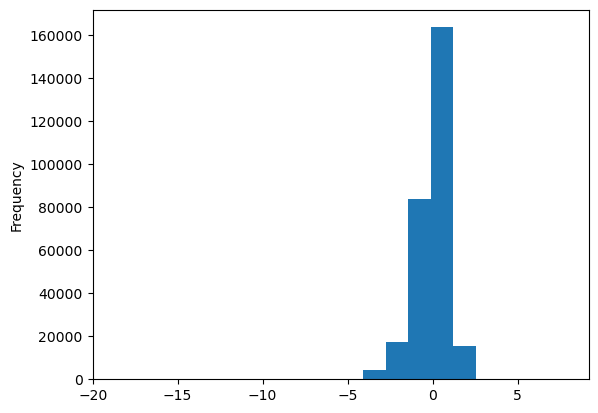

Column: V13
Unique values: 275663


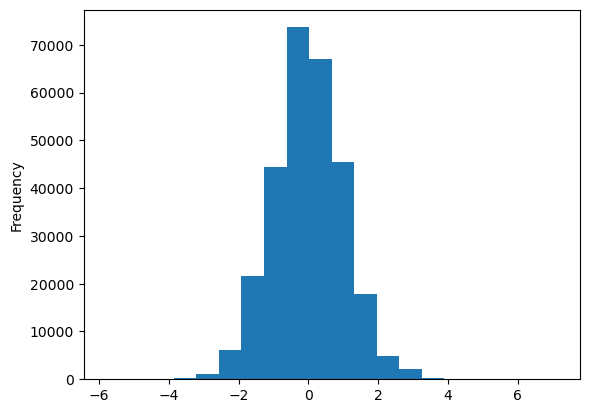

Column: V14
Unique values: 275663


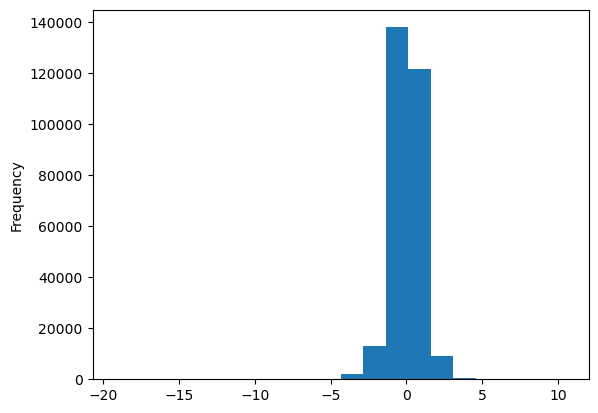

Column: V15
Unique values: 275663


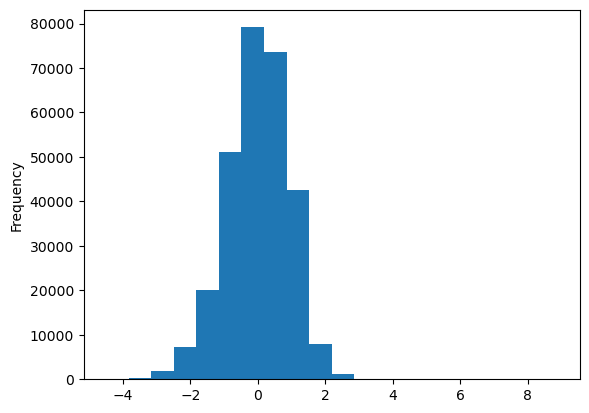

Column: V16
Unique values: 275663


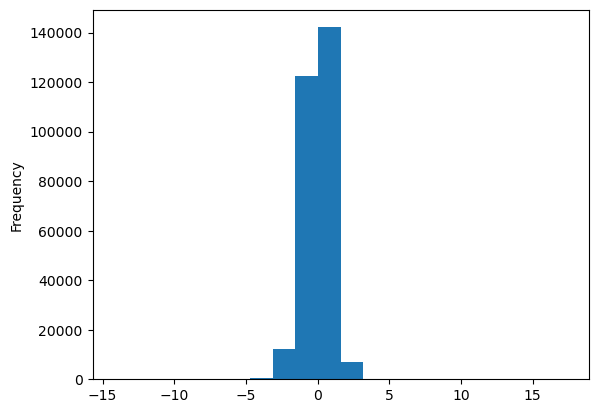

Column: V17
Unique values: 275663


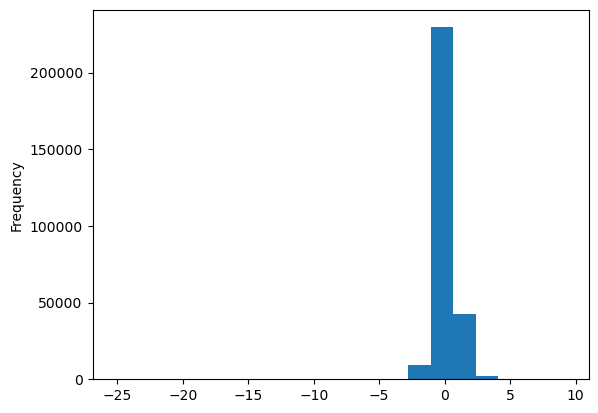

Column: V18
Unique values: 275663


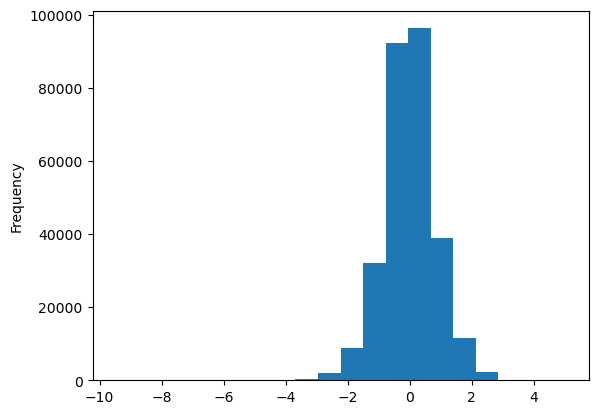

Column: V19
Unique values: 275663


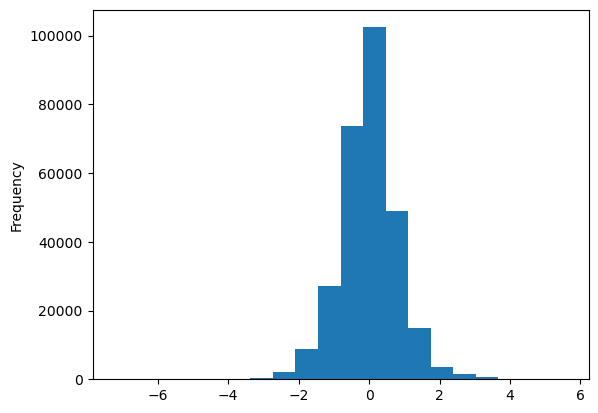

Column: V20
Unique values: 275663


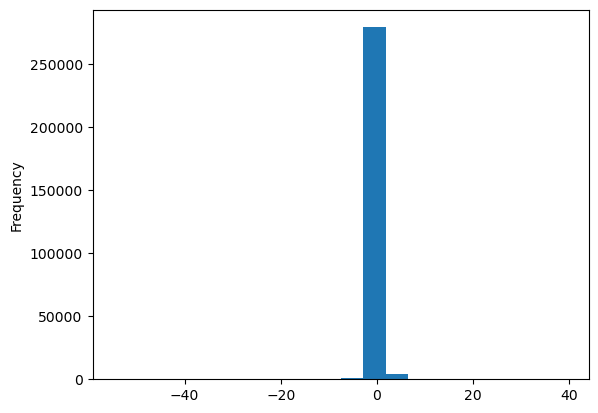

Column: V21
Unique values: 275663


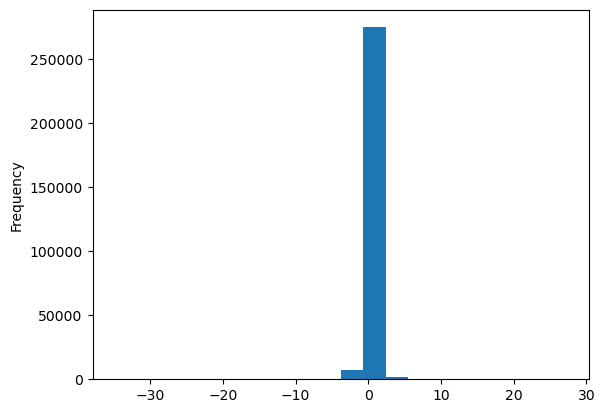

Column: V22
Unique values: 275663


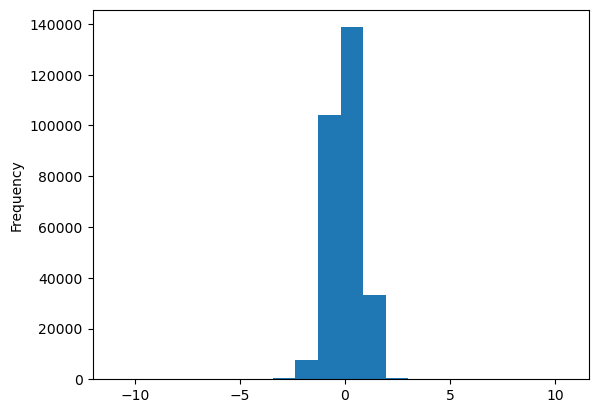

Column: V23
Unique values: 275663


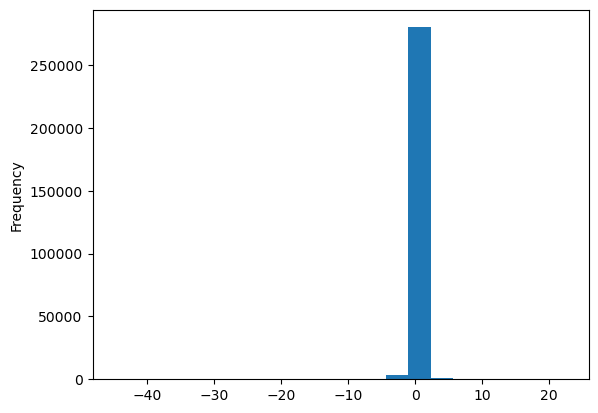

Column: V24
Unique values: 275663


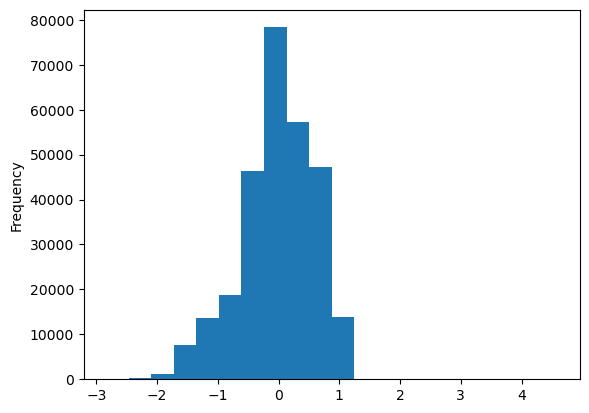

Column: V25
Unique values: 275663


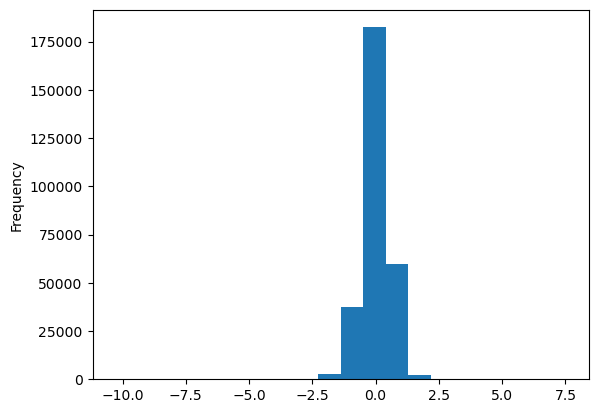

Column: V26
Unique values: 275663


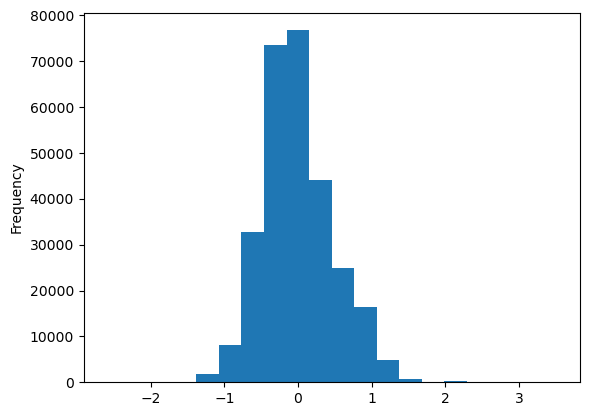

Column: V27
Unique values: 275663


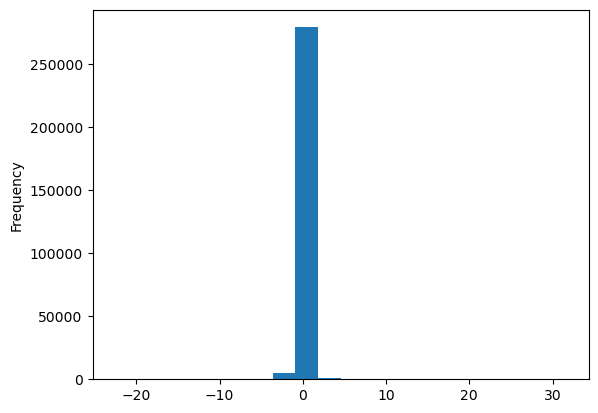

Column: V28
Unique values: 275663


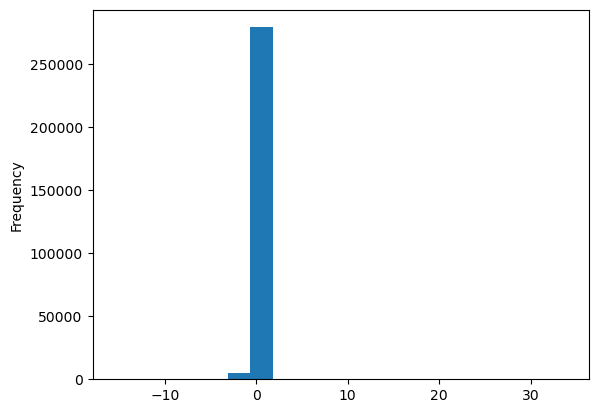

Column: Amount
Unique values: 32767


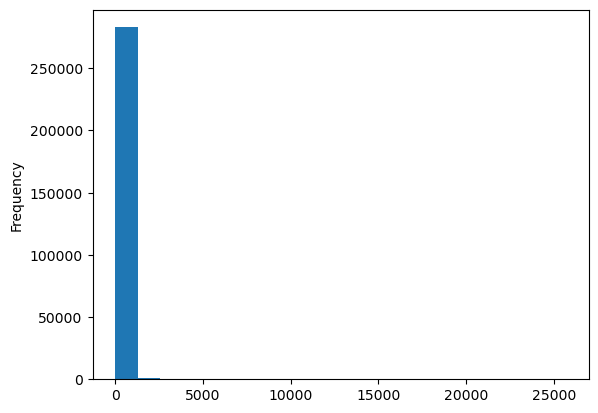

Column: Class
Unique values: 2


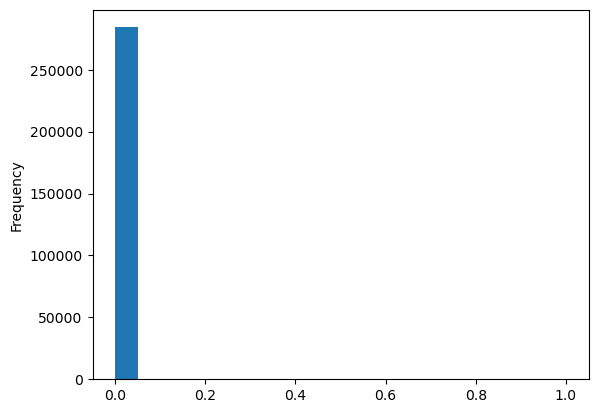

In [19]:
for column in raw_df.columns[1:]:
    print(f'Column: {column}')
    print(f'Unique values: {len(raw_df[column].unique())}')
    raw_df[column].plot.hist(bins=20)
    plt.show()

In [20]:
raw_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [21]:
raw_df['Class'].value_counts() / raw_df.shape[0] * 100

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

<Axes: >

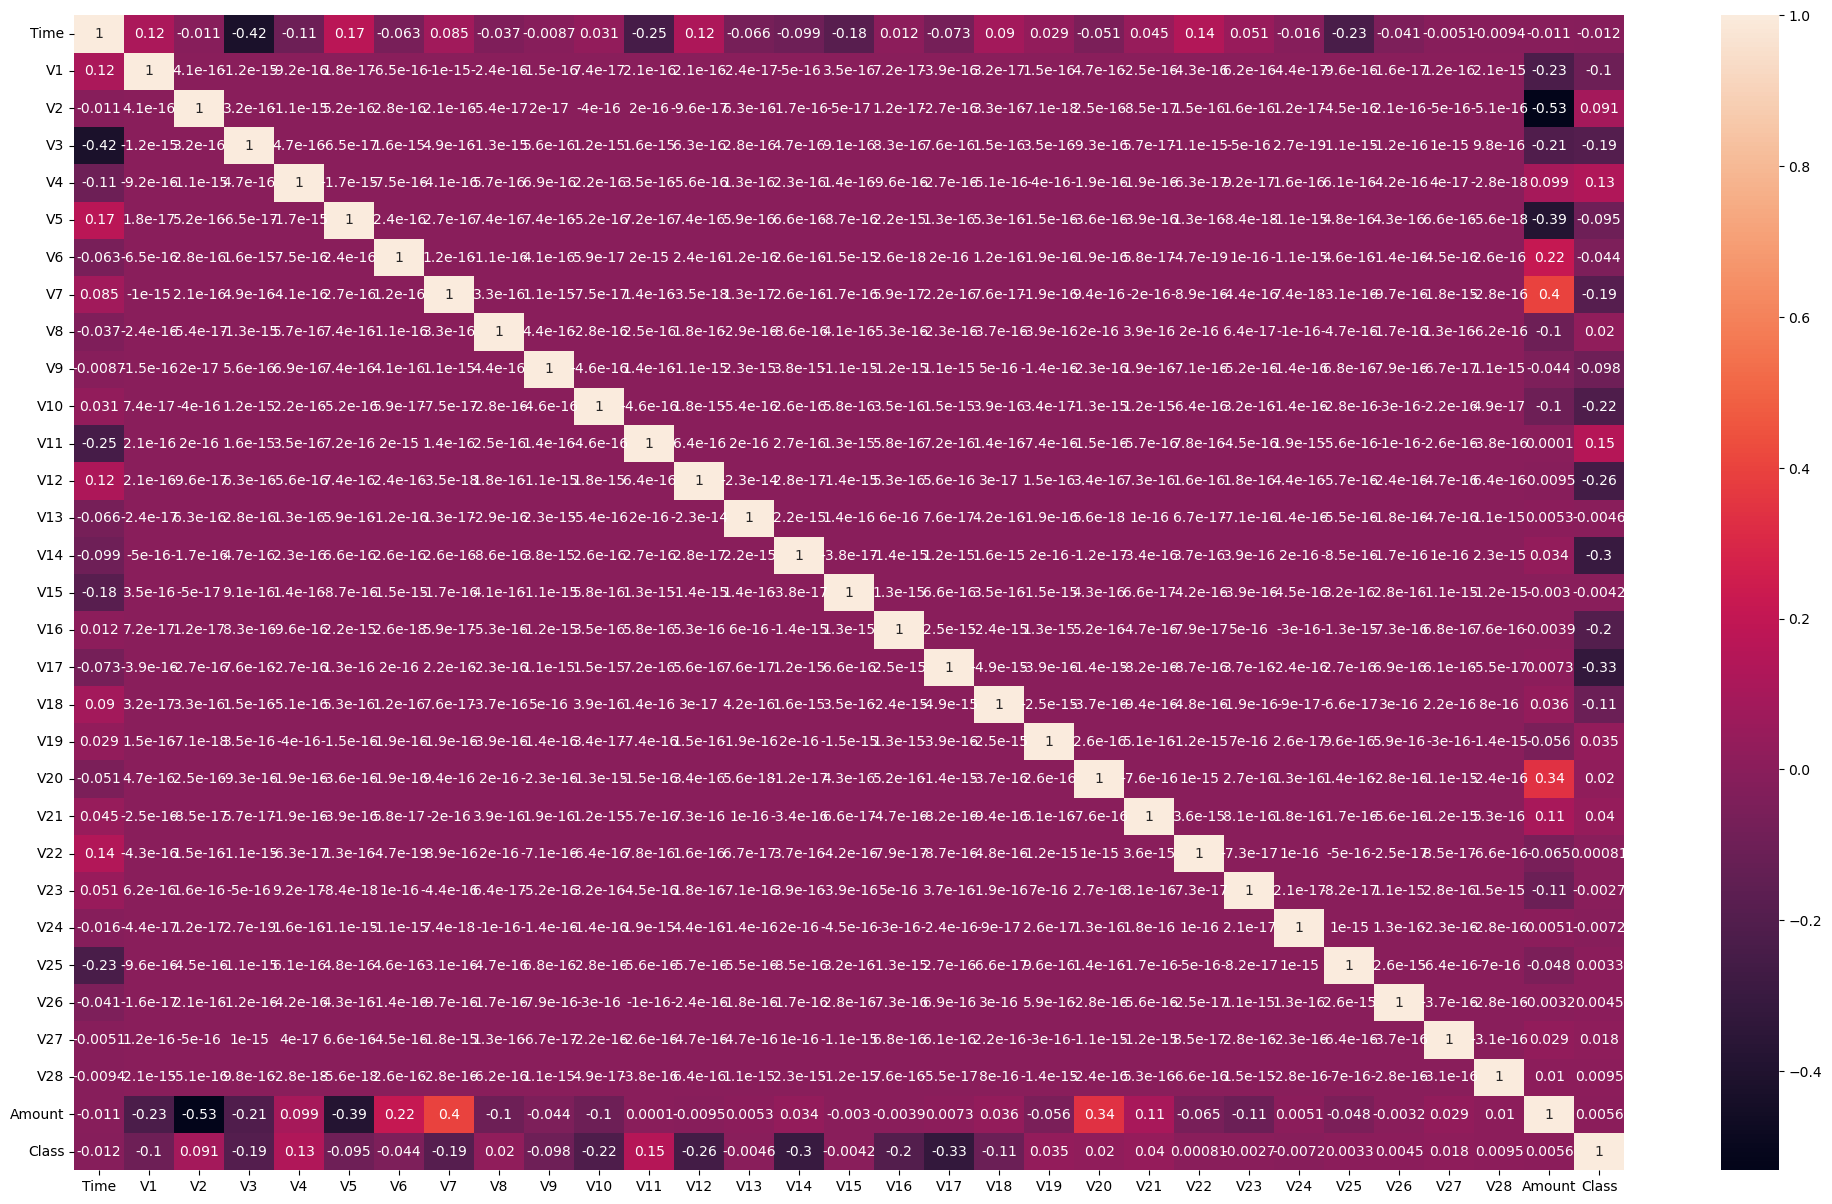

In [22]:
plt.figure(figsize=(25,15))
sns.heatmap(raw_df.corr(), annot=True)

<Axes: >

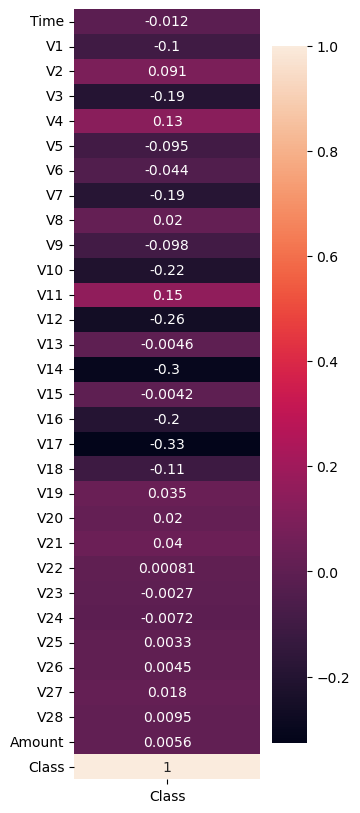

In [23]:
plt.figure(figsize=(3,10))
sns.heatmap(pd.DataFrame(raw_df.corr()['Class']), annot=True)

In [24]:
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2013-09-04 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2013-09-04 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2013-09-04 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,2013-09-04 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2013-09-04 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Conclusion:
1. "Time", "Amount" and "Class" are the only columns that are meaningful.
2. "Class" is highly imbalanced. Only 0.17% of the transactions are frauds. Even based on 284 807 records, models will be trained and tested on only 492 frauds.
3. There is no way to find out what features from "V1" to "V28" stands for due to "confidentiality issues" and PCA transformation. There is no way to check if those features are redundant based only on their name and quick data analysis.
4. The amount of unique records is the same in all of those features: 275,663, so there might be 275,663 credit cards or bank clients.

# Feature engineering based on "Time", initial features correlations, the handling outliers in "Amount" and a more detailed and in-depth examination of this last meaningful feature.

In [25]:
raw_df['0-3am'] = raw_df['Time'].apply(lambda x: 1 if x.hour < 3 else 0)
raw_df['3-6am'] = raw_df['Time'].apply(lambda x: 1 if x.hour >= 3 and x.hour < 6 else 0)
raw_df['6-9am'] = raw_df['Time'].apply(lambda x: 1 if x.hour >= 6 and x.hour < 9 else 0)
raw_df['9-12am'] = raw_df['Time'].apply(lambda x: 1 if x.hour >= 9 and x.hour < 12 else 0)
raw_df['12am-3pm'] = raw_df['Time'].apply(lambda x: 1 if x.hour >= 12 and x.hour < 15 else 0)
raw_df['3-6pm'] = raw_df['Time'].apply(lambda x: 1 if x.hour >= 15 and x.hour < 18 else 0)
raw_df['6-9pm'] = raw_df['Time'].apply(lambda x: 1 if x.hour >= 18 and x.hour < 21 else 0)
raw_df['9-12pm'] = raw_df['Time'].apply(lambda x: 1 if x.hour >= 21 and x.hour < 24 else 0)

raw_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Class,0-3am,3-6am,6-9am,9-12am,12am-3pm,3-6pm,6-9pm,9-12pm
0,2013-09-04 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,0,1,0,0,0,0,0,0,0
1,2013-09-04 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,0,1,0,0,0,0,0,0,0
2,2013-09-04 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,0,1,0,0,0,0,0,0,0


<Axes: >

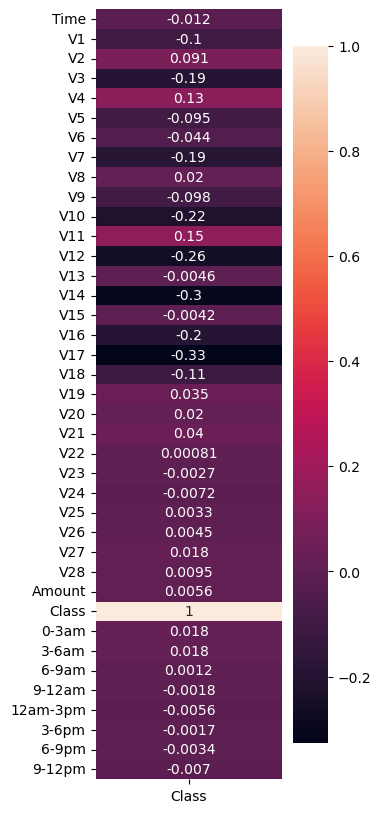

In [26]:
plt.figure(figsize=(3,10))
sns.heatmap(pd.DataFrame(raw_df.corr()['Class']), annot=True)

In [27]:
raw_df['Amount'].describe().round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

In [28]:
raw_df[['Amount','Class']].head()

,Amount,Class
0,149.62,0
1,2.69,0
2,378.66,0
3,123.50,0
4,69.99,0


In [29]:
raw_df.groupby('Amount').agg({'Class': 'sum'}).sort_values('Class', ascending=False).head(20)

,Class
Amount,
1.00,113
0.00,27
99.99,27
0.76,17
0.77,10
0.01,5
3.79,4
2.00,4
2.28,3


In [30]:
raw_df.groupby('Amount').agg({'Class': 'sum'}).sort_values('Class', ascending=False).shape

(32767, 1)

In [31]:
Amount_Class_corr_df = raw_df.groupby('Amount').agg({'Class': 'sum'}).sort_values('Class', ascending=False).reset_index()
Amount_Class_corr_df

,Amount,Class
0,1.00,113
1,0.00,27
2,99.99,27
3,0.76,17
4,0.77,10
...,...,...
32762,116.72,0
32763,116.71,0
32764,116.70,0
32765,116.69,0


In [32]:
Amount_Class_corr_df = Amount_Class_corr_df.loc[Amount_Class_corr_df["Class"] > 0]
Amount_Class_corr_df

,Amount,Class
0,1.00,113
1,0.00,27
2,99.99,27
3,0.76,17
4,0.77,10
...,...,...
254,11.40,1
255,30.26,1
256,261.22,1
257,11.39,1


In [33]:
Amount_Class_corr_df.describe().round(2)

,Amount,Class
count,259.00,259.00
mean,210.22,1.90
std,323.09,7.39
min,0.00,1.00
25%,11.39,1.00
50%,88.00,1.00
75%,271.50,1.00
max,2125.87,113.00


In [34]:
raw_df[["Amount"]].describe().round(2)

,Amount
count,284807.00
mean,88.35
std,250.12
min,0.00
25%,5.60
50%,22.00
75%,77.16
max,25691.16


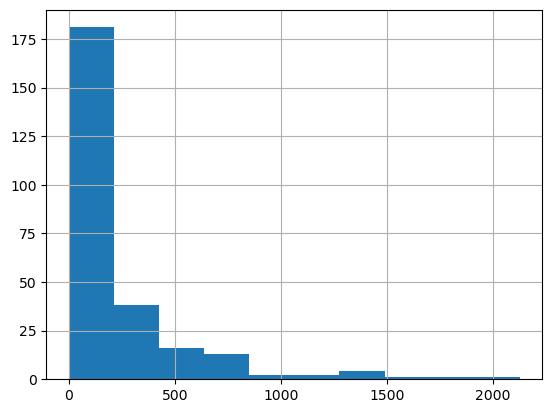

In [35]:
Amount_Class_corr_df["Amount"].hist()
plt.show()

In [36]:
Amount_Class_corr_df.sort_values('Amount', ascending=False).head(10)

,Amount,Class
157,2125.87,1
74,1809.68,1
246,1504.93,1
61,1402.16,1
181,1389.56,1
128,1354.25,1
152,1335.00,1
42,1218.89,1
239,1096.99,1
131,996.27,1


### So the higher the amount, the less fraud.

In [37]:
round(np.percentile(raw_df["Amount"], 99))

1018

In [38]:
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Class,0-3am,3-6am,6-9am,9-12am,12am-3pm,3-6pm,6-9pm,9-12pm
0,2013-09-04 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,0,1,0,0,0,0,0,0,0
1,2013-09-04 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,0,1,0,0,0,0,0,0,0
2,2013-09-04 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,0,1,0,0,0,0,0,0,0
3,2013-09-04 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,0,1,0,0,0,0,0,0,0
4,2013-09-04 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,0,1,0,0,0,0,0,0,0


In [39]:
Amount_outliers = np.percentile(raw_df["Amount"], 99)

raw_df['Amount_no_outliers'] = raw_df['Amount'].apply(lambda x: Amount_outliers
                                                      if x > Amount_outliers
                                                      else x)

In [40]:
raw_df[["Amount", "Amount_no_outliers"]]

,Amount,Amount_no_outliers
0,149.62,149.62
1,2.69,2.69
2,378.66,378.66
3,123.50,123.50
4,69.99,69.99
...,...,...
284802,0.77,0.77
284803,24.79,24.79
284804,67.88,67.88
284805,10.00,10.00


array([[<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Amount_no_outliers'}>]], dtype=object)

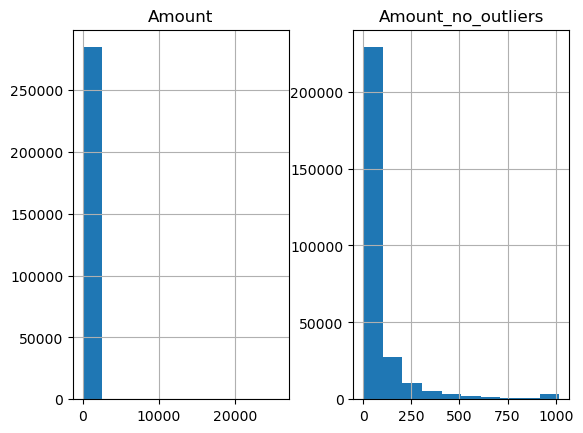

In [41]:
raw_df[["Amount", "Amount_no_outliers"]].hist()

<Axes: >

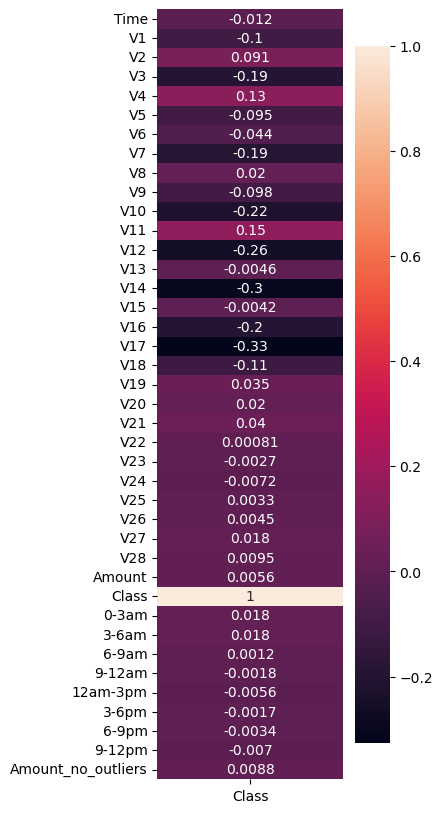

In [42]:
plt.figure(figsize=(3,10))
sns.heatmap(pd.DataFrame(raw_df.corr()['Class']), annot=True)

In [43]:
pd.DataFrame(raw_df.corr()['Class']).sort_values('Class').round(2).head(12)

,Class
V17,-0.33
V14,-0.30
V12,-0.26
V10,-0.22
V16,-0.20
V3,-0.19
V7,-0.19
V18,-0.11
V1,-0.10
V9,-0.10


In [44]:
pd.DataFrame(raw_df.corr()['Class']).sort_values('Class', ascending=False).round(2).head(5)

,Class
Class,1.00
V11,0.15
V4,0.13
V2,0.09
V21,0.04


### Since everything indicates that columns V1-28 have as many values as there are customers (or credit cards), it is necessary to consider adding a column indicating whether fraud has already occurred with the given V1-28 values, as it's possible that subsequent transactions of the same customer may also be fraudulent.

In [45]:
raw_df.groupby('V17').agg({'Class': 'sum'}).sort_values('Class', ascending=False).head(20)

,Class
V17,
-6.248145,6
-12.462315,4
-11.939092,2
-15.486990,2
-1.372629,2
-15.841616,2
-16.044524,2
-18.174617,2
-18.912494,2


In [46]:
raw_df.loc[raw_df['V17'].round(6) == -6.248145]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,0-3am,3-6am,6-9am,9-12am,12am-3pm,3-6pm,6-9pm,9-12pm,Amount_no_outliers
102441,2013-09-04 18:56:47,-13.192671,12.785971,-9.90665,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.39154,...,1,0,0,0,0,0,0,1,0,1.0
102442,2013-09-04 18:56:47,-13.192671,12.785971,-9.90665,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.39154,...,1,0,0,0,0,0,0,1,0,1.0
102443,2013-09-04 18:56:47,-13.192671,12.785971,-9.90665,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.39154,...,1,0,0,0,0,0,0,1,0,1.0
102444,2013-09-04 18:56:47,-13.192671,12.785971,-9.90665,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.39154,...,1,0,0,0,0,0,0,1,0,1.0
102445,2013-09-04 18:56:47,-13.192671,12.785971,-9.90665,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.39154,...,1,0,0,0,0,0,0,1,0,1.0
102446,2013-09-04 18:56:47,-13.192671,12.785971,-9.90665,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.39154,...,1,0,0,0,0,0,0,1,0,1.0


In [47]:
raw_df.loc[raw_df['V17'].round(6) == -12.462315]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,0-3am,3-6am,6-9am,9-12am,12am-3pm,3-6pm,6-9pm,9-12pm,Amount_no_outliers
151006,2013-09-05 02:12:42,-26.457745,16.497472,-30.177317,8.904157,-17.8926,-1.227904,-31.197329,-11.43892,-9.462573,...,1,1,0,0,0,0,0,0,0,1.0
151007,2013-09-05 02:12:42,-26.457745,16.497472,-30.177317,8.904157,-17.8926,-1.227904,-31.197329,-11.43892,-9.462573,...,1,1,0,0,0,0,0,0,0,1.0
151008,2013-09-05 02:12:42,-26.457745,16.497472,-30.177317,8.904157,-17.8926,-1.227904,-31.197329,-11.43892,-9.462573,...,1,1,0,0,0,0,0,0,0,1.0
151009,2013-09-05 02:12:42,-26.457745,16.497472,-30.177317,8.904157,-17.8926,-1.227904,-31.197329,-11.43892,-9.462573,...,1,1,0,0,0,0,0,0,0,1.0


In [48]:
raw_df.loc[raw_df['V17'].round(6) == -11.939092]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,0-3am,3-6am,6-9am,9-12am,12am-3pm,3-6pm,6-9pm,9-12pm,Amount_no_outliers
143335,2013-09-04 23:41:25,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.57878,-4.684952,...,1,0,0,0,0,0,0,0,1,252.92
143336,2013-09-04 23:41:25,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.57878,-4.684952,...,1,0,0,0,0,0,0,0,1,252.92


### Based on the above, we can infer that if a given customer (or credit card) has already had fraud assigned, the subsequent ones will be fraudulent as well.

### First and foremost, it should be noted that consecutive fraudulent transactions by the same customer are made in the same second.

### So introducing a column with information on whether a given customer had already been assigned fraud  can lead to overfitting of the model since it would mostly rely on the 'Class' column, and the model wouldn't be able to detect other unauthorized transactions within the same second.

### To improve the accuracy metrics of future models, it is important to shuffle the dataset.

In [49]:
raw_df = raw_df.sample(frac=1, random_state=123).reset_index(drop=True)
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,0-3am,3-6am,6-9am,9-12am,12am-3pm,3-6pm,6-9pm,9-12pm,Amount_no_outliers
0,2013-09-04 15:16:32,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,...,0,0,0,0,0,0,1,0,0,50.00
1,2013-09-05 16:33:03,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,...,0,0,0,0,0,0,1,0,0,58.00
2,2013-09-05 15:27:53,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,...,0,0,0,0,0,0,1,0,0,198.00
3,2013-09-05 12:47:42,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,...,0,0,0,0,0,1,0,0,0,82.00
4,2013-09-05 09:03:21,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,...,0,0,0,0,1,0,0,0,0,93.75


In [50]:
raw_df = raw_df.rename(columns={'Class': 'is_fraud'}).drop('Time', axis=1)
raw_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,is_fraud,0-3am,3-6am,6-9am,9-12am,12am-3pm,3-6pm,6-9pm,9-12pm,Amount_no_outliers
0,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,-0.283034,...,0,0,0,0,0,0,1,0,0,50.00
1,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,0.705357,...,0,0,0,0,0,0,1,0,0,58.00
2,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,-0.181429,...,0,0,0,0,0,0,1,0,0,198.00
3,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,1.171678,...,0,0,0,0,0,1,0,0,0,82.00
4,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,1.014140,...,0,0,0,0,1,0,0,0,0,93.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,2.085321,-1.119472,-0.260414,-0.829419,-1.373550,-0.504944,-1.224794,0.027016,0.011921,0.910736,...,0,0,0,0,0,1,0,0,0,22.49
284803,-1.039001,0.950070,0.389899,-1.217401,1.855856,3.640886,-0.549604,1.505694,-0.559184,-0.619047,...,0,0,0,1,0,0,0,0,0,5.99
284804,1.129333,0.471653,0.657500,2.454111,-0.091741,-0.089917,0.008581,0.060009,-0.623285,0.661338,...,0,0,0,0,1,0,0,0,0,11.99
284805,1.636784,-0.560857,-1.944589,0.405452,0.157569,-0.635650,0.315338,-0.200477,0.678971,-0.775364,...,0,0,0,0,0,0,0,0,1,203.97


In [51]:
pd.DataFrame(raw_df.corr().abs()['is_fraud']).sort_values('is_fraud', ascending=False).round(2)

,is_fraud
is_fraud,1.00
V17,0.33
V14,0.30
V12,0.26
V10,0.22
V16,0.20
V3,0.19
V7,0.19
V11,0.15
V4,0.13


# NORMALIZED DATASET
## - keeping all the frauds and leaving the same amount of random non-frauds
### (another shuffling is important)

In [52]:
raw_df['is_fraud'].value_counts()

is_fraud
0    284315
1       492
Name: count, dtype: int64

In [53]:
all_fraud_df = raw_df.loc[raw_df['is_fraud'] == 1]
non_fraud_df = raw_df.loc[raw_df['is_fraud'] == 0][:492]

normal_distributed_df = pd.concat([all_fraud_df, non_fraud_df])

In [54]:
normal_distributed_df = normal_distributed_df.sample(frac=1, random_state=123).reset_index(drop=True)
normal_distributed_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,is_fraud,0-3am,3-6am,6-9am,9-12am,12am-3pm,3-6pm,6-9pm,9-12pm,Amount_no_outliers
0,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,...,1,0,1,0,0,0,0,0,0,1.00
1,1.119087,0.489290,0.859777,2.514961,-0.297404,-0.279156,-0.031703,0.088515,-0.575189,0.662904,...,0,0,0,0,0,1,0,0,0,2.69
2,1.767082,-1.227225,-1.099232,-1.918915,-0.811343,-0.825275,-0.216196,-0.119441,2.344188,-1.291912,...,0,0,0,0,0,0,0,0,1,151.72
3,-1.896737,-7.759689,-3.896707,0.547629,-0.761138,4.884110,1.125785,0.565855,0.274801,-0.466078,...,0,0,0,0,0,0,0,1,0,1017.97
4,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,-1.965309,...,1,0,0,0,1,0,0,0,0,776.83


In [55]:
normal_distributed_df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,is_fraud,0-3am,3-6am,6-9am,9-12am,12am-3pm,3-6pm,6-9pm,9-12pm,Amount_no_outliers
979,-10.300820,6.483095,-15.076363,6.554191,-8.880252,-4.471672,-14.900689,3.840170,-4.358441,-14.533162,...,1,1,0,0,0,0,0,0,0,1.00
980,0.202402,1.176270,0.346379,2.882138,1.407133,-0.504355,1.438537,-0.395603,-1.555142,1.081514,...,1,0,0,0,0,0,0,1,0,7.59
981,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,-4.980928,...,1,0,0,0,0,1,0,0,0,88.00
982,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,-4.350685,...,1,0,0,0,0,0,1,0,0,1017.97
983,2.053311,0.089735,-1.681836,0.454212,0.298310,-0.953526,0.152003,-0.207071,0.587335,-0.362047,...,0,0,0,0,0,0,1,0,0,8.99


In [56]:
normal_distributed_df['is_fraud'].value_counts() / normal_distributed_df.shape[0] * 100

is_fraud
1    50.0
0    50.0
Name: count, dtype: float64

In [57]:
normal_distributed_df['is_fraud'].value_counts()

is_fraud
1    492
0    492
Name: count, dtype: int64

## Checking the features correlations and dropping features that are correlated with 'is_fraud' less than 0.3 (also in raw dataset).

<Axes: >

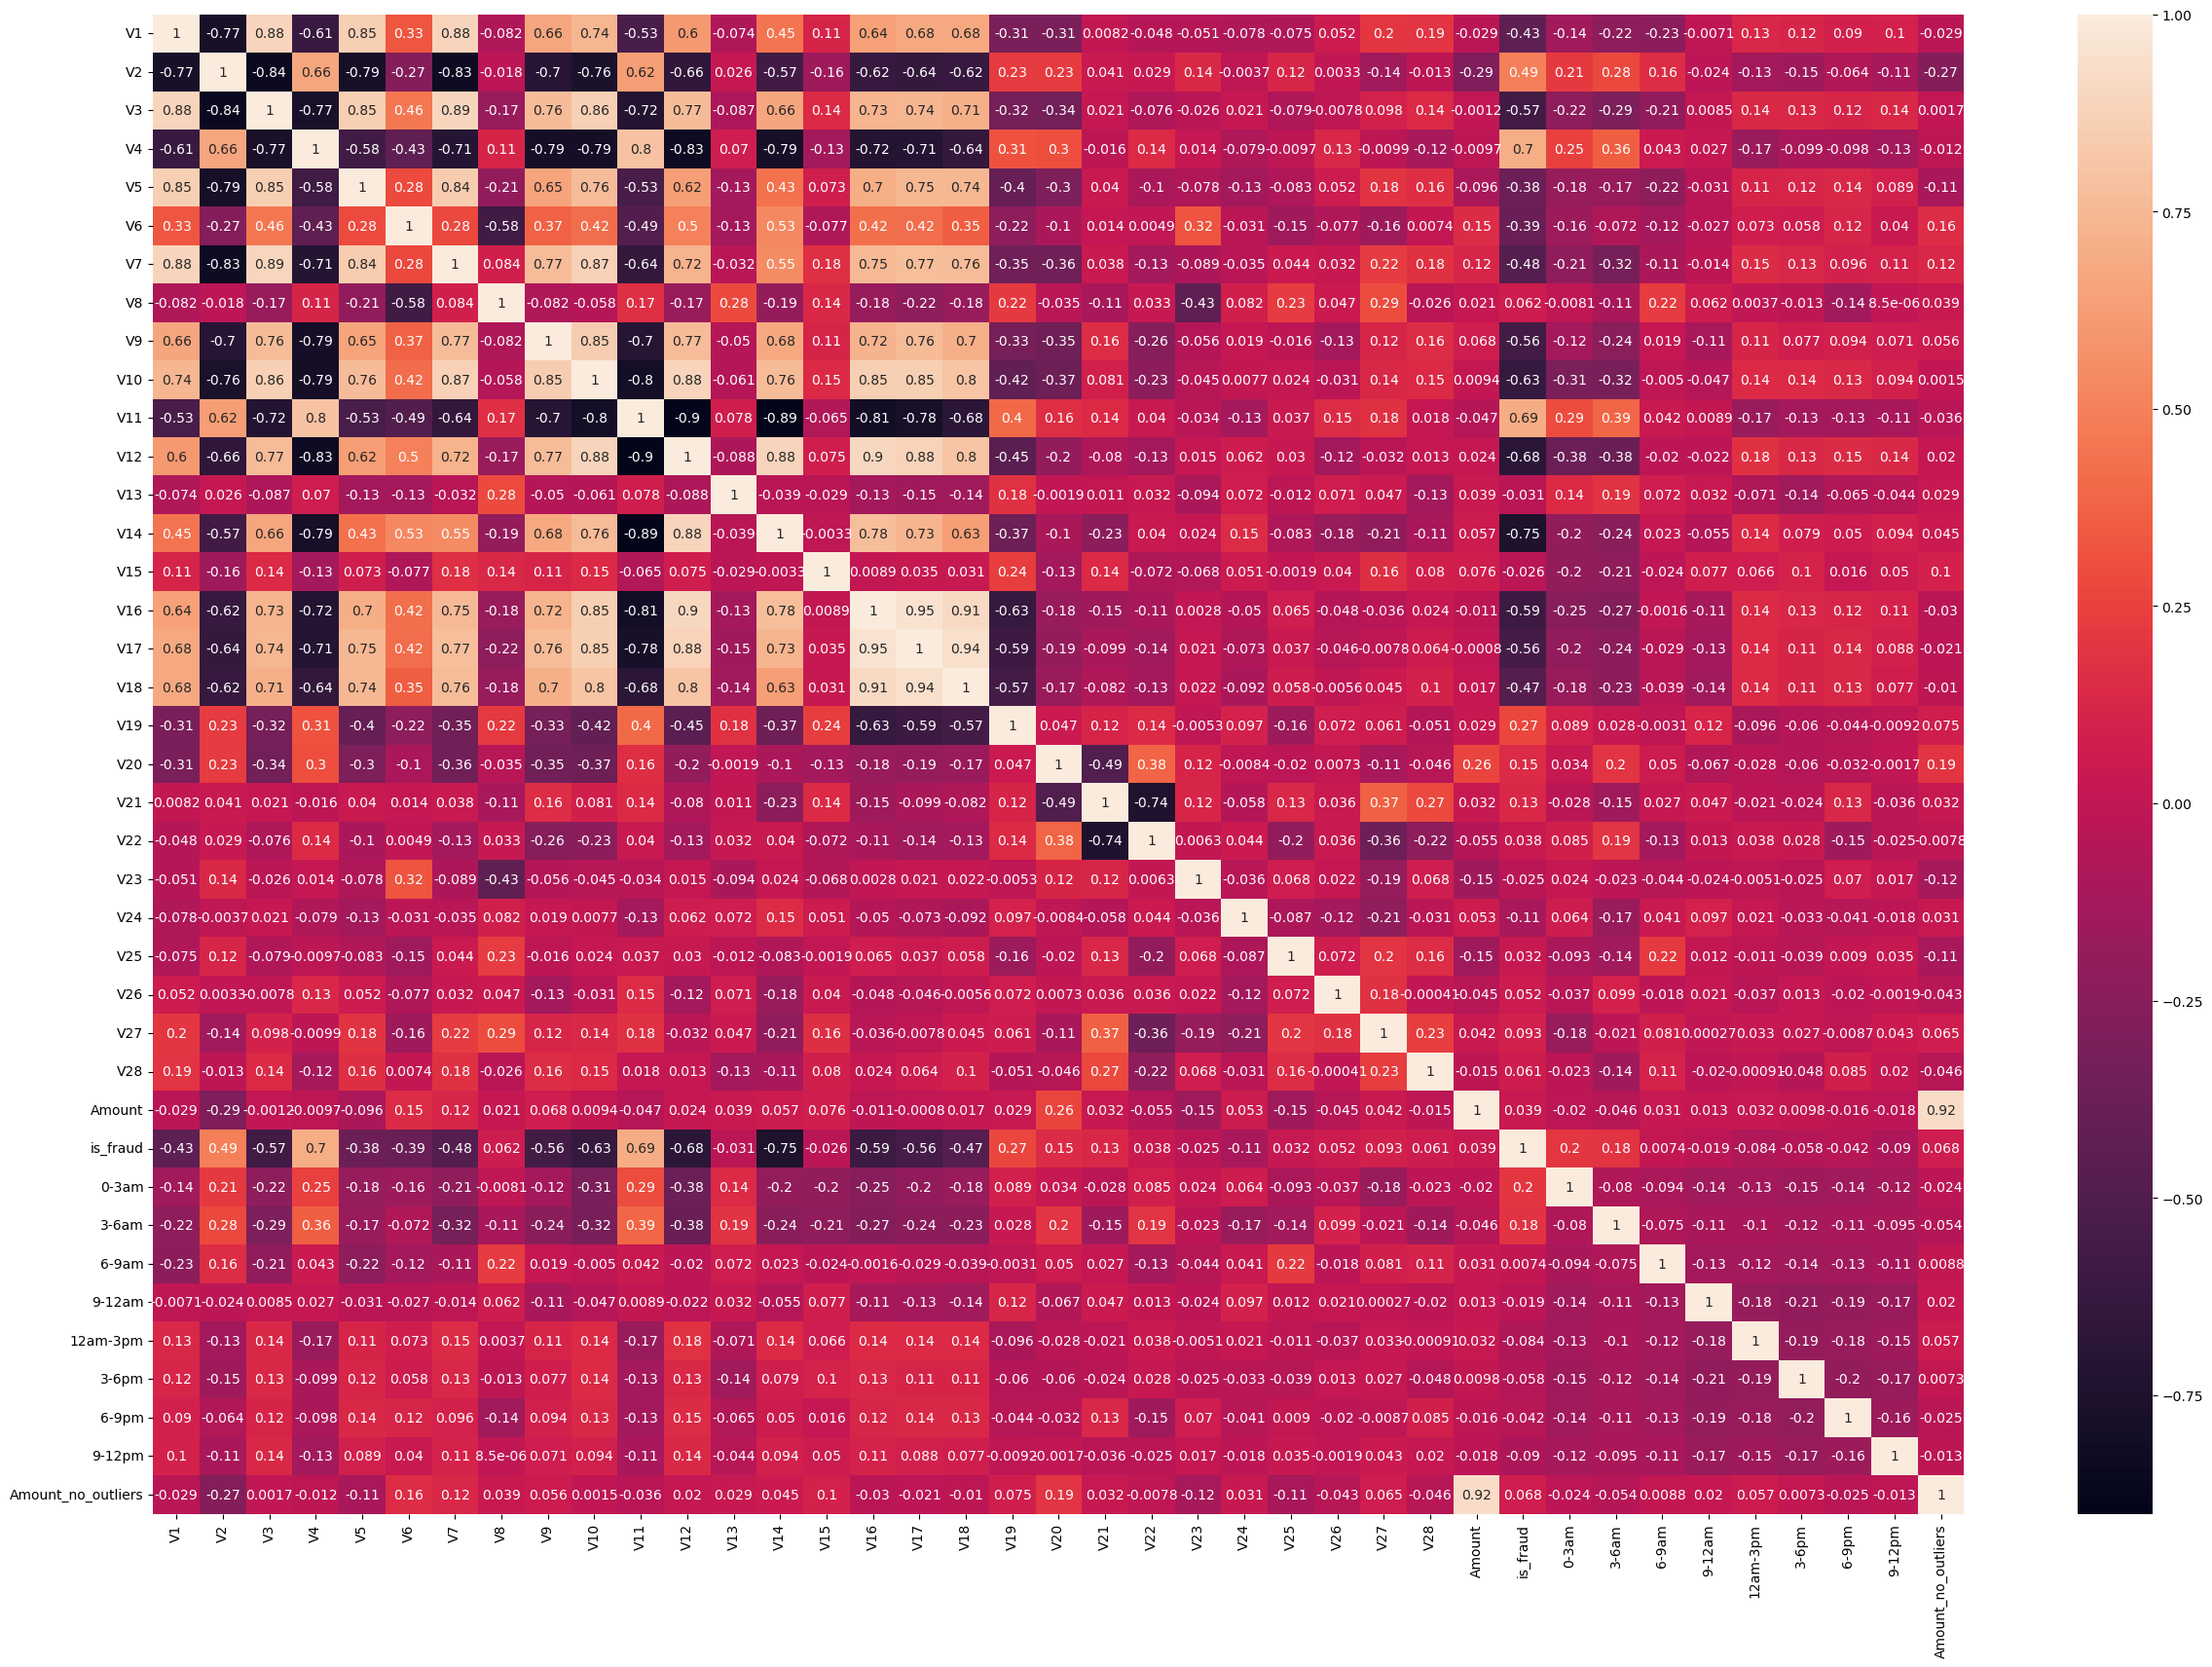

In [58]:
plt.figure(figsize=(30,20))
sns.heatmap(normal_distributed_df.corr(), annot=True)

<Axes: >

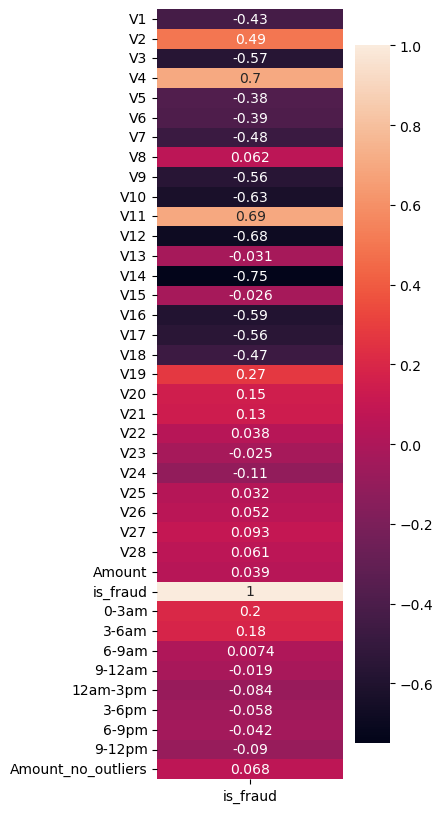

In [59]:
plt.figure(figsize=(3,10))
sns.heatmap(pd.DataFrame(normal_distributed_df.corr()['is_fraud']), annot=True)

In [60]:
pd.DataFrame(normal_distributed_df.corr().abs()['is_fraud']).sort_values('is_fraud', ascending=False).round(2)

,is_fraud
is_fraud,1.00
V14,0.75
V4,0.70
V11,0.69
V12,0.68
V10,0.63
V16,0.59
V3,0.57
V9,0.56
V17,0.56


In [61]:
normal_distributed_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,is_fraud,0-3am,3-6am,6-9am,9-12am,12am-3pm,3-6pm,6-9pm,9-12pm,Amount_no_outliers
0,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,...,1,0,1,0,0,0,0,0,0,1.00
1,1.119087,0.489290,0.859777,2.514961,-0.297404,-0.279156,-0.031703,0.088515,-0.575189,0.662904,...,0,0,0,0,0,1,0,0,0,2.69
2,1.767082,-1.227225,-1.099232,-1.918915,-0.811343,-0.825275,-0.216196,-0.119441,2.344188,-1.291912,...,0,0,0,0,0,0,0,0,1,151.72
3,-1.896737,-7.759689,-3.896707,0.547629,-0.761138,4.884110,1.125785,0.565855,0.274801,-0.466078,...,0,0,0,0,0,0,0,1,0,1017.97
4,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,-1.965309,...,1,0,0,0,1,0,0,0,0,776.83


In [62]:
normal_distributed_df.corr().abs()['is_fraud'] >= 0.3

V1                     True
V2                     True
V3                     True
V4                     True
V5                     True
V6                     True
V7                     True
V8                    False
V9                     True
V10                    True
V11                    True
V12                    True
V13                   False
V14                    True
V15                   False
V16                    True
V17                    True
V18                    True
V19                   False
V20                   False
V21                   False
V22                   False
V23                   False
V24                   False
V25                   False
V26                   False
V27                   False
V28                   False
Amount                False
is_fraud               True
0-3am                 False
3-6am                 False
6-9am                 False
9-12am                False
12am-3pm              False
3-6pm               

In [63]:
cols_to_drop = [col for col in normal_distributed_df
                if abs(normal_distributed_df[col].corr(normal_distributed_df['is_fraud'])) < 0.3]
cols_to_drop

['V8',
 'V13',
 'V15',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 '0-3am',
 '3-6am',
 '6-9am',
 '9-12am',
 '12am-3pm',
 '3-6pm',
 '6-9pm',
 '9-12pm',
 'Amount_no_outliers']

In [64]:
normal_distributed_df = normal_distributed_df.drop(cols_to_drop, axis=1)
normal_distributed_df

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,is_fraud
0,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,-5.902828,-12.840934,12.018913,-17.769143,-19.214325,-10.266609,-15.503392,-5.494928,1
1,1.119087,0.489290,0.859777,2.514961,-0.297404,-0.279156,-0.031703,-0.575189,0.662904,-0.182005,-0.511827,0.580473,0.445630,-0.181454,-0.875169,0
2,1.767082,-1.227225,-1.099232,-1.918915,-0.811343,-0.825275,-0.216196,2.344188,-1.291912,0.781026,1.816618,0.219797,-0.778793,-0.343162,0.201129,0
3,-1.896737,-7.759689,-3.896707,0.547629,-0.761138,4.884110,1.125785,0.274801,-0.466078,-0.682929,0.622498,0.083939,-1.770555,0.221136,0.987745,0
4,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,0.940006,-1.965309,0.159744,-0.490697,-1.958876,-1.341269,2.498325,0.777831,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-10.300820,6.483095,-15.076363,6.554191,-8.880252,-4.471672,-14.900689,-4.358441,-14.533162,7.588741,-15.835719,-11.567006,-11.467430,-19.172996,-6.969856,1
980,0.202402,1.176270,0.346379,2.882138,1.407133,-0.504355,1.438537,-1.555142,1.081514,-1.514205,-0.973764,0.141332,0.418268,-0.828193,-0.302239,1
981,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,0.183961,-4.980928,3.657882,-6.409822,-8.509433,-5.369890,-9.069079,-2.819807,1
982,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,-0.802005,-4.350685,3.064246,-2.718731,-5.586873,-2.502049,-4.460495,-0.870526,1


In [65]:
normal_distributed_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'is_fraud'],
      dtype='object')

<Axes: >

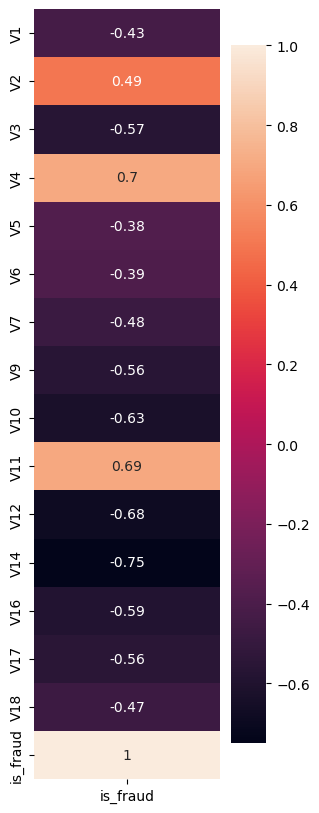

In [66]:
plt.figure(figsize=(3,10))
sns.heatmap(pd.DataFrame(normal_distributed_df.corr()['is_fraud']), annot=True)

In [67]:
pd.DataFrame(normal_distributed_df.corr().abs()['is_fraud']).sort_values('is_fraud', ascending=False).round(2)

,is_fraud
is_fraud,1.00
V14,0.75
V4,0.70
V11,0.69
V12,0.68
V10,0.63
V16,0.59
V3,0.57
V9,0.56
V17,0.56


<Axes: >

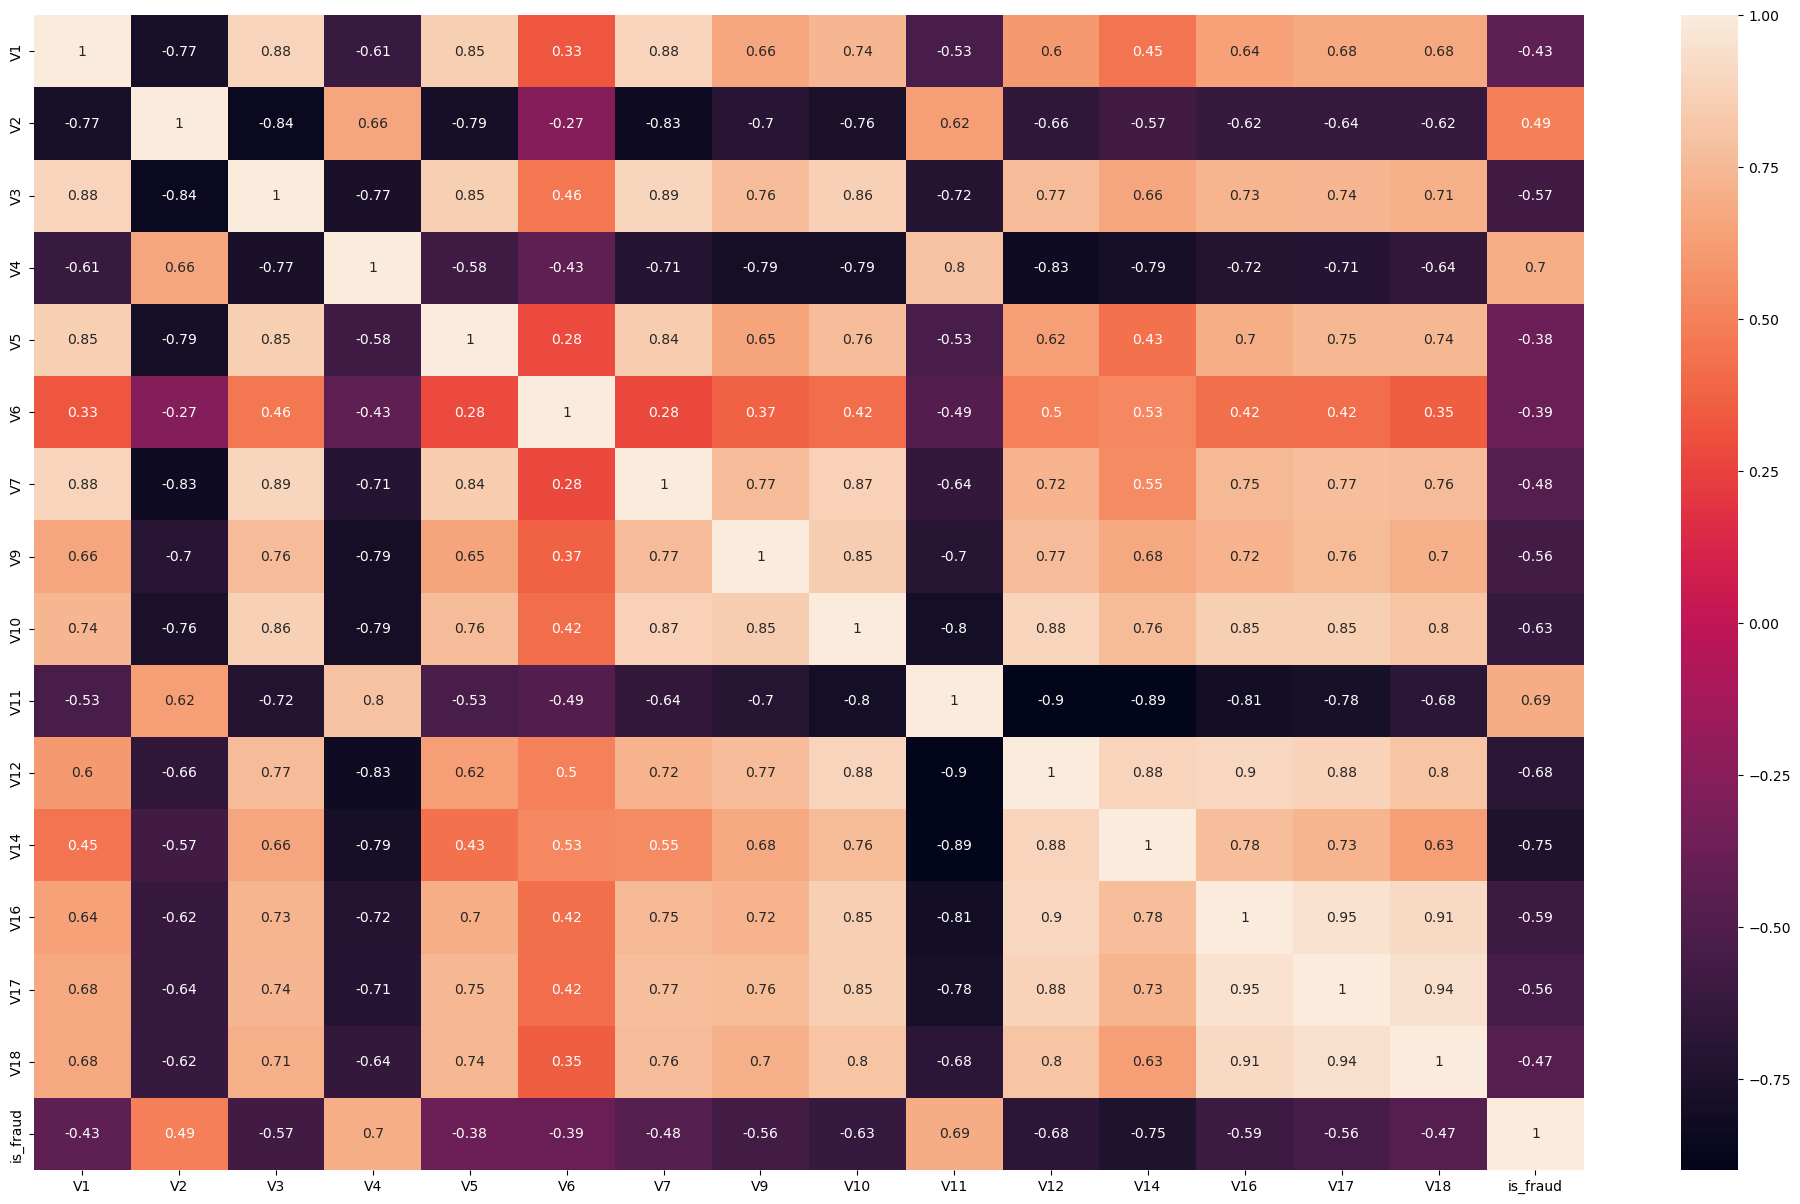

In [68]:
plt.figure(figsize=(25,15))
sns.heatmap(normal_distributed_df.corr(), annot=True)

In [69]:
final_df = raw_df.drop(cols_to_drop, axis=1)
final_df

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,is_fraud
0,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,-0.935937,-0.283034,0.561420,0.072299,1.038824,0.142775,-0.336206,0.889158,0
1,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.083026,0.705357,-1.552107,-0.415248,-0.533137,1.220128,-0.147484,-1.221457,0
2,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.079937,-0.181429,0.973005,0.852258,-0.585198,0.304602,0.269934,0.493657,0
3,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.349534,1.171678,-0.231315,0.401726,-1.652165,-1.252411,1.285789,-0.353220,0
4,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.649028,1.014140,-0.174764,-0.447357,0.156966,1.529087,-0.607303,-0.288013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,2.085321,-1.119472,-0.260414,-0.829419,-1.373550,-0.504944,-1.224794,0.011921,0.910736,0.883775,0.117669,-0.335447,1.398323,-0.115791,-0.450625,0
284803,-1.039001,0.950070,0.389899,-1.217401,1.855856,3.640886,-0.549604,-0.559184,-0.619047,-0.367044,-0.159028,0.382726,0.878467,-0.810875,0.529523,0
284804,1.129333,0.471653,0.657500,2.454111,-0.091741,-0.089917,0.008581,-0.623285,0.661338,-0.430787,-0.387554,0.450810,0.459083,-0.322231,-0.663011,0
284805,1.636784,-0.560857,-1.944589,0.405452,0.157569,-0.635650,0.315338,0.678971,-0.775364,0.901013,1.196302,-1.362731,0.306970,0.626742,0.620876,0


# Splitting the NORMALIZED dataset into training and testing sets, and then training and validating the models.

In [70]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(normal_distributed_df.drop('is_fraud', axis=1), 
                                                    normal_distributed_df['is_fraud'], 
                                                    test_size=0.199, # keeps exactly the same amount in 'X' as in 'y'
                                                    stratify=normal_distributed_df['is_fraud'],
                                                    random_state=123)

In [71]:
[X_train_norm, 
X_test_norm,
y_train_norm,
y_test_norm]

[           V1        V2        V3        V4        V5        V6        V7  \
 741  0.139011 -2.026272 -0.769670  0.544686  0.880033  4.173093 -0.571048   
 291 -1.149708  1.296460  0.594109 -0.005954  0.807037 -0.936121  1.306393   
 926  1.135144  0.087993  0.410433  1.284997 -0.200191  0.104860 -0.130604   
 382  2.043736 -0.180890 -1.265385  0.186965  0.110830 -0.545486  0.003094   
 573  1.049842  0.010789  1.341220  1.209495 -0.929694 -0.173618 -0.528967   
 ..        ...       ...       ...       ...       ...       ...       ...   
 835  0.196707  1.189757  0.704882  2.891388  0.045555  1.245730 -1.198714   
 874  1.177824  2.487103 -5.330608  5.324547  1.150243 -1.281843 -1.171994   
 76   0.364377  1.443523 -2.220907  2.036985 -1.237055 -1.728161 -2.058582   
 465 -1.723782  1.819034 -1.542979 -1.147863  0.766143  1.302460 -0.303131   
 39   0.911460 -0.405461  0.876589  1.268641 -0.852546 -0.084587 -0.346334   
 
            V9       V10       V11       V12       V14       V

In [72]:
y_train_norm.value_counts(), y_test_norm.value_counts()

(is_fraud
 0    394
 1    394
 Name: count, dtype: int64,
 is_fraud
 1    98
 0    98
 Name: count, dtype: int64)

In [73]:
y_train_norm.value_counts() / y_train_norm.shape[0] * 100, y_test_norm.value_counts() / y_test_norm.shape[0] * 100

(is_fraud
 0    50.0
 1    50.0
 Name: count, dtype: float64,
 is_fraud
 1    50.0
 0    50.0
 Name: count, dtype: float64)

In [74]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', LogisticRegression())
]

pipeline_LogReg_norm = Pipeline(steps=steps)
pipeline_LogReg_norm.fit(X_train_norm, y_train_norm)

time_pipeline_LogReg_norm = round(time.time() - start_time, 2)

preds = pipeline_LogReg_norm.predict(X_test_norm)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_LogReg_norm = [[name, round(metric(preds, y_test_norm),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_LogReg_norm]
                                ]

metrics_pipeline_LogReg_norm = pd.DataFrame(metrics_pipeline_LogReg_norm,
                                            columns=('', 'LogReg_norm')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_norm.columns,
             "importance": (np.abs(pipeline_LogReg_norm.named_steps['model'].coef_[0])
                                    * 100 / sum(np.abs(pipeline_LogReg_norm.named_steps['model'].coef_[0]))).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_LogReg_norm)
display(feature_importances)

,LogReg_norm
,
Accuracy,0.9439
Precision,0.8980
Recall,0.9888
F1,0.9412
Time,0.1300


,importance
feature,
V1,19.8
V2,14.7
V4,12.9
V11,10.8
V6,7.7
V14,6.7
V18,5.9
V3,5.1
V5,5.0


In [75]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', DecisionTreeClassifier())
]

pipeline_Tree_norm = Pipeline(steps=steps)
pipeline_Tree_norm.fit(X_train_norm, y_train_norm)

time_pipeline_Tree_norm = round(time.time() - start_time, 2)

preds = pipeline_Tree_norm.predict(X_test_norm)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Tree_norm = [[name, round(metric(preds, y_test_norm),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_Tree_norm]
                                ]

metrics_pipeline_Tree_norm = pd.DataFrame(metrics_pipeline_Tree_norm,
                                            columns=('', 'Tree_norm')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_norm.columns,
             "importance": (pipeline_Tree_norm.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_Tree_norm)
display(feature_importances)

,Tree_norm
,
Accuracy,0.8827
Precision,0.8980
Recall,0.8713
F1,0.8844
Time,0.0200


,importance
feature,
V1,76.5
V2,4.5
V4,2.7
V10,2.4
V6,1.9
V12,1.9
V17,1.9
V9,1.8
V18,1.7


In [76]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', RandomForestClassifier())
]

pipeline_Forest_norm = Pipeline(steps=steps)
pipeline_Forest_norm.fit(X_train_norm, y_train_norm)

time_pipeline_Forest_norm = round(time.time() - start_time, 2)

preds = pipeline_Forest_norm.predict(X_test_norm)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Forest_norm = [[name, round(metric(preds, y_test_norm),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_Forest_norm]
                                ]

metrics_pipeline_Forest_norm = pd.DataFrame(metrics_pipeline_Forest_norm,
                                            columns=('', 'Forest_norm')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_norm.columns,
             "importance": (pipeline_Forest_norm.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_Forest_norm)
display(feature_importances)

,Forest_norm
,
Accuracy,0.9286
Precision,0.9082
Recall,0.9468
F1,0.9271
Time,0.2100


,importance
feature,
V1,39.6
V2,23.8
V3,6.9
V4,5.1
V5,3.6
V10,2.8
V11,2.6
V6,2.2
V17,2.2


In [77]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', XGBClassifier())
]

pipeline_XGB_norm = Pipeline(steps=steps)
pipeline_XGB_norm.fit(X_train_norm, y_train_norm)

time_pipeline_XGB_norm = round(time.time() - start_time, 2)

preds = pipeline_XGB_norm.predict(X_test_norm)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_XGB_norm = [[name, round(metric(preds, y_test_norm),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_XGB_norm]
                                ]

metrics_pipeline_XGB_norm = pd.DataFrame(metrics_pipeline_XGB_norm,
                                            columns=('', 'XGB_norm')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_norm.columns,
             "importance": (pipeline_XGB_norm.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_XGB_norm)
display(feature_importances)

,XGB_norm
,
Accuracy,0.9337
Precision,0.8878
Recall,0.9775
F1,0.9305
Time,0.1300


,importance
feature,
V1,59.0
V2,7.1
V4,4.9
V10,3.6
V11,2.8
V6,2.7
V12,2.7
V18,2.7
V7,2.5


# Splitting the NON-normalized dataset into training and testing sets, and then training and validating the models.

### (while ensuring that only the testing set is normalized, so the 'Accuracy' score is reliable)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('is_fraud', axis=1), 
                                                    final_df['is_fraud'], 
                                                    test_size=0.2,
                                                    stratify=final_df['is_fraud'],
                                                    random_state=123)

In [79]:
y_train.value_counts(), y_test.value_counts(),

(is_fraud
 0    227451
 1       394
 Name: count, dtype: int64,
 is_fraud
 0    56864
 1       98
 Name: count, dtype: int64)

In [80]:
y_train.value_counts() / y_train.shape[0] * 100, y_test.value_counts() / y_test.shape[0] * 100

(is_fraud
 0    99.827075
 1     0.172925
 Name: count, dtype: float64,
 is_fraud
 0    99.827955
 1     0.172045
 Name: count, dtype: float64)

In [81]:
X_test, y_test

(              V1        V2        V3        V4        V5        V6        V7  \
 24683  -1.593332  0.093556  0.630891 -0.821696  1.113369 -1.358810  1.076003   
 124188  1.753215 -1.046138 -0.758575  0.557024  1.171107  4.870920 -1.856526   
 214197 -0.841759 -0.004213 -0.316152  0.754097  2.394233  0.269749  0.214540   
 64832   1.192194 -0.461654  0.015102  0.317217  1.297562  4.413773 -1.448439   
 116154 -1.336379  0.803282  0.728648 -0.817892  0.623442  0.277671  0.337488   
 ...          ...       ...       ...       ...       ...       ...       ...   
 260448  1.225191 -0.464575  0.278467  0.543971 -0.521320  0.364138 -0.500104   
 154392 -0.394635 -0.276334  0.132364 -1.401117  0.340532 -1.433816  0.328506   
 160598  2.095311 -0.070879 -2.114115  0.105000  0.735413 -0.076923 -0.080387   
 134531  1.239323  0.545896  0.169513  2.098566  0.667948  0.735439  0.033270   
 278421 -1.694095  1.375827  1.798297 -1.325162  0.621555 -0.533863  0.753475   
 
               V9       V1

In [82]:
X_y_test = pd.merge(X_test, y_test, left_index=True, right_index=True)

In [83]:
X_y_test

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,is_fraud
24683,-1.593332,0.093556,0.630891,-0.821696,1.113369,-1.358810,1.076003,0.016231,-0.453481,-0.901905,0.032124,-0.047568,0.010262,-0.597410,-0.881910,0
124188,1.753215,-1.046138,-0.758575,0.557024,1.171107,4.870920,-1.856526,1.825159,-0.054156,-0.762514,0.640857,-0.690942,0.119091,-0.480392,0.251364,0
214197,-0.841759,-0.004213,-0.316152,0.754097,2.394233,0.269749,0.214540,-1.291829,0.476688,1.514284,0.279224,1.204408,-2.176008,1.301015,-1.025201,0
64832,1.192194,-0.461654,0.015102,0.317217,1.297562,4.413773,-1.448439,1.223291,-0.249366,-0.880295,0.439799,-0.597709,0.167578,-0.517588,0.418628,0
116154,-1.336379,0.803282,0.728648,-0.817892,0.623442,0.277671,0.337488,-0.594307,-0.771539,-0.085852,0.249406,0.545132,0.558497,-0.713371,0.608546,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260448,1.225191,-0.464575,0.278467,0.543971,-0.521320,0.364138,-0.500104,-0.855180,0.874437,0.475612,0.303266,0.284213,-1.888486,0.204919,1.088952,0
154392,-0.394635,-0.276334,0.132364,-1.401117,0.340532,-1.433816,0.328506,-1.021637,0.508268,-1.531103,-1.186075,0.399767,-1.364265,-0.344706,1.481828,0
160598,2.095311,-0.070879,-2.114115,0.105000,0.735413,-0.076923,-0.080387,0.618010,-0.145928,-0.057621,-0.595165,-0.282299,0.881987,0.007188,0.749195,0
134531,1.239323,0.545896,0.169513,2.098566,0.667948,0.735439,0.033270,-0.678473,0.622075,-1.474722,-0.301865,0.186275,0.879616,-0.891616,-0.492455,0


In [84]:
X_y_test.value_counts("is_fraud") / X_y_test.shape[0] * 100

is_fraud
0    99.827955
1     0.172045
Name: count, dtype: float64

In [85]:
X_y_test['is_fraud'].value_counts()

is_fraud
0    56864
1       98
Name: count, dtype: int64

In [86]:
y_train.shape[0] + X_y_test.loc[X_y_test['is_fraud'] == 0][98:]['is_fraud'].shape[0]

284611

In [87]:
y_train = pd.concat(
    [y_train,
     (X_y_test.loc[X_y_test['is_fraud'] == 0][98:])['is_fraud']])
y_train

136371    0
214650    0
274157    0
101787    0
58997     0
         ..
260448    0
154392    0
160598    0
134531    0
278421    0
Name: is_fraud, Length: 284611, dtype: int64

In [88]:
y_train.value_counts()

is_fraud
0    284217
1       394
Name: count, dtype: int64

In [89]:
X_train = pd.concat(
    [X_train,
     (X_y_test.loc[X_y_test['is_fraud'] == 0][98:]).drop('is_fraud', axis=1)])

X_train

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18
136371,1.147453,0.169921,0.107944,0.428241,-0.081716,-0.575489,0.252880,-0.427275,0.068270,1.849592,0.985068,0.774749,-0.113567,-0.132744,-0.865116
214650,0.905219,-0.628453,0.425105,0.263475,-0.083835,1.322819,-0.587172,2.214416,-0.930413,1.003671,-2.268323,1.576104,-1.594751,2.194734,-2.226157
274157,-0.952457,1.484818,1.480450,0.089976,0.381702,-0.783340,1.400403,0.881542,1.707870,0.184640,-0.646162,-1.436449,-0.321551,-0.213149,-0.173121
101787,-6.168734,5.308461,-4.764475,-0.734801,-3.494095,-1.846573,-2.758955,0.350296,0.716549,-2.195543,1.926296,2.607860,0.954083,1.242983,-0.541608
58997,-0.942352,1.075937,0.644943,-0.729171,1.409192,-0.679065,1.137491,-0.684114,-1.287391,-0.615632,0.112652,-1.158167,0.244752,0.385277,-0.241573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260448,1.225191,-0.464575,0.278467,0.543971,-0.521320,0.364138,-0.500104,-0.855180,0.874437,0.475612,0.303266,0.284213,-1.888486,0.204919,1.088952
154392,-0.394635,-0.276334,0.132364,-1.401117,0.340532,-1.433816,0.328506,-1.021637,0.508268,-1.531103,-1.186075,0.399767,-1.364265,-0.344706,1.481828
160598,2.095311,-0.070879,-2.114115,0.105000,0.735413,-0.076923,-0.080387,0.618010,-0.145928,-0.057621,-0.595165,-0.282299,0.881987,0.007188,0.749195
134531,1.239323,0.545896,0.169513,2.098566,0.667948,0.735439,0.033270,-0.678473,0.622075,-1.474722,-0.301865,0.186275,0.879616,-0.891616,-0.492455


In [90]:
X_train.shape[0]

284611

In [91]:
X_train.shape[0] == y_train.shape[0] 

True

In [92]:
X_y_test = pd.concat(
    [X_y_test.loc[X_y_test['is_fraud'] == 1],
     X_y_test.loc[X_y_test['is_fraud'] == 0][:98]])

X_test = X_y_test.drop('is_fraud', axis=1)
y_test = X_y_test['is_fraud']

In [93]:
y_test.value_counts() / y_test.shape[0] * 100

is_fraud
1    50.0
0    50.0
Name: count, dtype: float64

In [94]:
y_test.value_counts()

is_fraud
1    98
0    98
Name: count, dtype: int64

In [95]:
X_test.shape[0] == y_test.shape[0]

True

In [96]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', LogisticRegression())
]

pipeline_LogReg_lossless = Pipeline(steps=steps)
pipeline_LogReg_lossless.fit(X_train, y_train)

time_pipeline_LogReg_lossless = round(time.time() - start_time, 2)

preds = pipeline_LogReg_lossless.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_LogReg_lossless = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_LogReg_lossless]
                                ]

metrics_pipeline_LogReg_lossless = pd.DataFrame(metrics_pipeline_LogReg_lossless,
                                            columns=('', 'LogReg_lossless')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train.columns,
             "importance": (np.abs(pipeline_LogReg_lossless.named_steps['model'].coef_[0])
                                    * 100 / sum(np.abs(pipeline_LogReg_lossless.named_steps['model'].coef_[0]))).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_LogReg_lossless)
display(feature_importances)

,LogReg_lossless
,
Accuracy,0.7908
Precision,0.5816
Recall,1.0000
F1,0.7355
Time,0.7800


,importance
feature,
V12,17.4
V3,13.0
V18,11.8
V16,10.7
V17,9.0
V14,6.3
V2,5.1
V7,4.7
V1,4.3


In [97]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', DecisionTreeClassifier())
]

pipeline_Tree_lossless = Pipeline(steps=steps)
pipeline_Tree_lossless.fit(X_train, y_train)

time_pipeline_Tree_lossless = round(time.time() - start_time, 2)

preds = pipeline_Tree_lossless.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Tree_lossless = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_Tree_lossless]
                                ]

metrics_pipeline_Tree_lossless = pd.DataFrame(metrics_pipeline_Tree_lossless,
                                            columns=('', 'Tree_lossless')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train.columns,
             "importance": (pipeline_Tree_lossless.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_Tree_lossless)
display(feature_importances)

,Tree_lossless
,
Accuracy,0.8724
Precision,0.7449
Recall,1.0000
F1,0.8538
Time,6.5200


,importance
feature,
V18,68.3
V14,3.9
V3,3.5
V6,3.3
V16,2.6
V17,2.5
V4,2.4
V7,2.3
V1,2.2


In [98]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', RandomForestClassifier())
]

pipeline_Forest_lossless = Pipeline(steps=steps)
pipeline_Forest_lossless.fit(X_train, y_train)

time_pipeline_Forest_lossless = round(time.time() - start_time, 2)

preds = pipeline_Forest_lossless.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Forest_lossless = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_Forest_lossless]
                                ]

metrics_pipeline_Forest_lossless = pd.DataFrame(metrics_pipeline_Forest_lossless,
                                            columns=('', 'Forest_lossless')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train.columns,
             "importance": (pipeline_Forest_lossless.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_Forest_lossless)
display(feature_importances)

,Forest_lossless
,
Accuracy,0.8878
Precision,0.7755
Recall,1.0000
F1,0.8736
Time,132.0200


,importance
feature,
V18,44.7
V17,6.7
V1,6.5
V10,6.3
V9,4.4
V7,4.2
V16,4.1
V3,3.3
V11,3.3


In [99]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', XGBClassifier())
]

pipeline_XGB_lossless = Pipeline(steps=steps)
pipeline_XGB_lossless.fit(X_train, y_train)

time_pipeline_XGB_lossless = round(time.time() - start_time, 2)

preds = pipeline_XGB_lossless.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_XGB_lossless = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_XGB_lossless]
                                ]

metrics_pipeline_XGB_lossless = pd.DataFrame(metrics_pipeline_XGB_lossless,
                                            columns=('', 'XGB_lossless')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train.columns,
             "importance": (pipeline_XGB_lossless.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_XGB_lossless)
display(feature_importances)

,XGB_lossless
,
Accuracy,0.8827
Precision,0.7653
Recall,1.0000
F1,0.8671
Time,54.4000


,importance
feature,
V18,37.599998
V17,6.700000
V12,6.600000
V5,5.000000
V6,4.600000
V14,4.600000
V16,4.600000
V4,4.300000
V7,4.200000


# SMOTE oversampling, then splitting dataset into training and testing sets, and then training and validating the models.

In [100]:
sm = SMOTE(sampling_strategy='minority', random_state=123)

In [101]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [102]:
X_test_sm = X_test
y_test_sm = y_test

In [103]:
X_train_sm.shape, y_train_sm.shape

((568434, 15), (568434,))

In [104]:
y_train_sm.value_counts()

is_fraud
0    284217
1    284217
Name: count, dtype: int64

In [125]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', LogisticRegression())
]

pipeline_LogReg_sm = Pipeline(steps=steps)
pipeline_LogReg_sm.fit(X_train_sm, y_train_sm)

time_pipeline_LogReg_sm = round(time.time() - start_time, 2)

preds = pipeline_LogReg_sm.predict(X_test_sm)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_LogReg_sm = [[name, round(metric(preds, y_test_sm),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_LogReg_sm]
                                ]

metrics_pipeline_LogReg_sm = pd.DataFrame(metrics_pipeline_LogReg_sm,
                                            columns=('', 'LogReg_sm')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_sm.columns,
             "importance": (np.abs(pipeline_LogReg_sm.named_steps['model'].coef_[0])
                                    * 100 / sum(np.abs(pipeline_LogReg_sm.named_steps['model'].coef_[0]))).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_LogReg_sm)
display(feature_importances)

,LogReg_sm
,
Accuracy,0.9439
Precision,0.9184
Recall,0.9677
F1,0.9424
Time,1.8900


,importance
feature,
V2,21.5
V1,19.2
V11,13.2
V4,11.4
V17,5.3
V6,5.2
V5,4.4
V16,4.1
V18,3.7


In [106]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', DecisionTreeClassifier())
]

pipeline_Tree_sm = Pipeline(steps=steps)
pipeline_Tree_sm.fit(X_train_sm, y_train_sm)

time_pipeline_Tree_sm = round(time.time() - start_time, 2)

preds = pipeline_Tree_sm.predict(X_test_sm)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Tree_sm = [[name, round(metric(preds, y_test_sm),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_Tree_sm]
                                ]

metrics_pipeline_Tree_sm = pd.DataFrame(metrics_pipeline_Tree_sm,
                                            columns=('', 'Tree_sm')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_sm.columns,
             "importance": (pipeline_Tree_sm.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_Tree_sm)
display(feature_importances)

,Tree_sm
,
Accuracy,0.8929
Precision,0.7857
Recall,1.0000
F1,0.8800
Time,14.6700


,importance
feature,
V1,70.8
V2,9.4
V4,3.1
V12,2.4
V11,2.1
V6,2.0
V14,1.9
V17,1.7
V3,1.2


In [107]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', RandomForestClassifier())
]

pipeline_Forest_sm = Pipeline(steps=steps)
pipeline_Forest_sm.fit(X_train_sm, y_train_sm)

time_pipeline_Forest_sm = round(time.time() - start_time, 2)

preds = pipeline_Forest_sm.predict(X_test_sm)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Forest_sm = [[name, round(metric(preds, y_test_sm),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_Forest_sm]
                                ]

metrics_pipeline_Forest_sm = pd.DataFrame(metrics_pipeline_Forest_sm,
                                            columns=('', 'Forest_sm')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_sm.columns,
             "importance": (pipeline_Forest_sm.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_Forest_sm)
display(feature_importances)

,Forest_sm
,
Accuracy,0.9184
Precision,0.8367
Recall,1.0000
F1,0.9111
Time,253.3200


,importance
feature,
V1,44.0
V2,23.0
V3,5.9
V4,4.7
V6,2.7
V17,2.7
V12,2.6
V11,2.1
V5,2.0


In [108]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', XGBClassifier())
]

pipeline_XGB_sm = Pipeline(steps=steps)
pipeline_XGB_sm.fit(X_train_sm, y_train_sm)

time_pipeline_XGB_sm = round(time.time() - start_time, 2)

preds = pipeline_XGB_sm.predict(X_test_sm)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_XGB_sm = [[name, round(metric(preds, y_test_sm),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_XGB_sm]
                                ]

metrics_pipeline_XGB_sm = pd.DataFrame(metrics_pipeline_XGB_sm,
                                            columns=('', 'XGB_sm')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_sm.columns,
             "importance": (pipeline_XGB_sm.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_XGB_sm)
display(feature_importances)

,XGB_sm
,
Accuracy,0.9082
Precision,0.8163
Recall,1.0000
F1,0.8989
Time,151.8000


,importance
feature,
V1,55.299999
V2,8.600000
V4,6.100000
V6,3.800000
V11,2.900000
V3,2.800000
V7,2.700000
V14,2.700000
V12,2.400000


# Summary of model performances.

In [109]:
pipelines_norm_metrics = pd.concat([metrics_pipeline_LogReg_norm,
                               metrics_pipeline_Tree_norm,
                               metrics_pipeline_Forest_norm,
                               metrics_pipeline_XGB_norm,
                              ], axis=1)

pipelines_lossless_metrics = pd.concat([metrics_pipeline_LogReg_lossless,
                               metrics_pipeline_Tree_lossless,
                               metrics_pipeline_Forest_lossless,
                               metrics_pipeline_XGB_lossless
                              ], axis=1)

pipelines_sm_metrics = pd.concat([metrics_pipeline_LogReg_sm,
                               metrics_pipeline_Tree_sm,
                               metrics_pipeline_Forest_sm,
                               metrics_pipeline_XGB_sm
                              ], axis=1)

display(pipelines_norm_metrics)
display(pipelines_lossless_metrics)
display(pipelines_sm_metrics)

,LogReg_norm,Tree_norm,Forest_norm,XGB_norm
,,,,
Accuracy,0.9439,0.8827,0.9286,0.9337
Precision,0.8980,0.8980,0.9082,0.8878
Recall,0.9888,0.8713,0.9468,0.9775
F1,0.9412,0.8844,0.9271,0.9305
Time,0.1300,0.0200,0.2100,0.1300


,LogReg_lossless,Tree_lossless,Forest_lossless,XGB_lossless
,,,,
Accuracy,0.7908,0.8724,0.8878,0.8827
Precision,0.5816,0.7449,0.7755,0.7653
Recall,1.0000,1.0000,1.0000,1.0000
F1,0.7355,0.8538,0.8736,0.8671
Time,0.7800,6.5200,132.0200,54.4000


,LogReg_sm,Tree_sm,Forest_sm,XGB_sm
,,,,
Accuracy,0.9439,0.8929,0.9184,0.9082
Precision,0.9184,0.7857,0.8367,0.8163
Recall,0.9677,1.0000,1.0000,1.0000
F1,0.9424,0.8800,0.9111,0.8989
Time,1.9100,14.6700,253.3200,151.8000


## Scores meaning:
- Accuracy (accuracy_score) - 'computes subset accuracy'
- Precision (precision_score) - 'the ability of the classifier not to label as positive a sample that is negative'
- Recall (recall_score) - 'the ability of the classifier to find all the positive samples'
- F1 (f1_score) - 'harmonic mean of the precision and recall'

## Conclusions:
- Due to splitting test sets equally between fraud and non-fraud transactions, the F1 score is very close to the accuracy score.
- The recall score tells us how accurate the classifier is in detecting fraud, which is the most important aspect.
- The precision score tells us how precise the classifier is in identifying non-fraud transactions. It is also important because the bank cannot afford to deal with too many false positives.

# Grid Search for Pipeline "LogReg_sm"

In [201]:
pipeline_LogReg_sm

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('model', LogisticRegression())])

In [121]:
pipeline_LogReg_sm.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('pca', PCA()),
  ('model', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'pca': PCA(),
 'model': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [245]:
start_time = time.time()

param_grid = dict(scaler = [None, StandardScaler(), MinMaxScaler(), PowerTransformer()],
#                   pca = [None, PCA()],
                  model__C = [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  model__penalty = ['l1', 'l2'],
                  model__max_iter = [1000]
                 )

grid_search = GridSearchCV(pipeline_LogReg_sm, param_grid, scoring="roc_auc", cv=5, n_jobs=1)
grid_search.fit(X_train_sm, y_train_sm)

print(f' Execution time: {round(time.time() - start_time, 2)}')

C:\Users\tress\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tress\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tress\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tress\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalt

 Execution time: 691.18


In [246]:
LogReg_sm_best_params = pd.DataFrame.from_dict(grid_search.best_params_,
                                                 orient='index',
                                                 columns=['LogReg_sm_best_params'])

preds = grid_search.best_estimator_.predict(X_test_sm)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_LogReg_sm_best_params = [[name, round(metric(preds, y_test_sm),4)]
                                            for metric, name in zip(metrics, metrics_name)]

metrics_pipeline_LogReg_sm_best_params = pd.DataFrame(metrics_pipeline_LogReg_sm_best_params,
                                            columns=('', 'LogReg_sm_best_params')).set_index('', inplace=False)

In [247]:
metrics_before_after_GridSearchCV = pd.concat([metrics_pipeline_LogReg_sm.drop('Time'),
                                               metrics_pipeline_LogReg_sm_best_params
                                              ], axis=1)

display(LogReg_sm_best_params)
display(metrics_before_after_GridSearchCV)

,LogReg_sm_best_params
model__C,1000
model__max_iter,1000
model__penalty,l2
scaler,PowerTransformer()


,LogReg_sm,LogReg_sm_best_params
,,
Accuracy,0.9439,0.9337
Precision,0.9184,0.8980
Recall,0.9677,0.9670
F1,0.9424,0.9312


# Grid Search for Pipeline "XGB_norm"

In [237]:
pipeline_XGB_norm

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [238]:
pipeline_XGB_norm.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('pca', PCA()),
  ('model',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
                 predictor=None, random_state=None, ...))],
 'verbose': False,
 'scaler': StandardScaler(),
 'pca': PCA(),
 'model': XGBClassifier(base_score=None, booster=None, callba

In [240]:
start_time = time.time()

param_grid = dict(scaler = [None, StandardScaler(), MinMaxScaler(), PowerTransformer()],
                  pca = [None, PCA()],
                  model__max_depth = [None, 10, 20],
                  model__max_leaves = [None, 10, 20],
                  model__max_bin= [None, 512]
                 )

grid_search = GridSearchCV(pipeline_XGB_norm, param_grid, scoring="roc_auc", cv=10, n_jobs=1)
grid_search.fit(X_train_norm, y_train_norm)

print(f' Execution time: {round(time.time() - start_time, 2)}')

 Execution time: 104.26


In [241]:
XGB_norm_best_params = pd.DataFrame.from_dict(grid_search.best_params_,
                                                 orient='index',
                                                 columns=['XGB_norm_best_params'])

preds = grid_search.best_estimator_.predict(X_test_norm)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_XGB_norm_best_params = [[name, round(metric(preds, y_test_norm),4)]
                                            for metric, name in zip(metrics, metrics_name)]

metrics_pipeline_XGB_norm_best_params = pd.DataFrame(metrics_pipeline_XGB_norm_best_params,
                                            columns=('', 'XGB_norm_best_params')).set_index('', inplace=False)

In [242]:
metrics_before_after_GridSearchCV = pd.concat([metrics_pipeline_XGB_norm.drop('Time'),
                                               metrics_pipeline_XGB_norm_best_params
                                              ], axis=1)

display(XGB_norm_best_params)
display(metrics_before_after_GridSearchCV)

,XGB_norm_best_params
model__max_bin,None
model__max_depth,10
model__max_leaves,None
pca,PCA()
scaler,None


,XGB_norm,XGB_norm_best_params
,,
Accuracy,0.9337,0.9490
Precision,0.8878,0.9082
Recall,0.9775,0.9889
F1,0.9305,0.9468
